In [1]:
require(data.table)
require(ggplot2)
require(RColorBrewer)
require(tidyr)
require(stringr)
require(iNEXT)
require(dplyr)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: RColorBrewer

Loading required package: tidyr

Loading required package: stringr

Loading required package: iNEXT

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
obis=fread("~/Documents/Lenfest/Plot_CSV_v2/us_obis_mpa_status.csv")

In [3]:
sampling=read.csv("~/Documents/Lenfest/Plot_CSV_v2/samplingProtocols.csv")

In [4]:
obis_sample=merge(obis, sampling, by="samplingProtocol", all.x=TRUE)

In [14]:
samplingNums=table(obis_sample$gen_protocol_SGW, obis_sample$MPA_Status, useNA = "always")

In [6]:
NROW(obis_sample)

[1] 8637907

In [15]:
samplingNums

             
                    0       1       2    <NA>
  grab          70098   41109     819       0
  hook            105       5       2       0
  net          188327   22560       3       0
  observation   27601    1021     811       0
  other        817117  210497  260970       0
  plankton       6071     120       3       0
  pot            2045   90173      13       0
  stranding         6       1       0       0
  suction         901       1       0       0
  survey       344447 1028033  696151       0
  trawl        291353   67092     167       0
  <NA>        3675855  569259  225171       0

In [16]:
4470285/8637907

[1] 0.5175195

In [18]:
samplingNums=as.data.frame(samplingNums)

In [19]:
samplingNums

Var1,Var2,Freq
<fct>,<fct>,<int>
grab,0,70098
hook,0,105
net,0,188327
observation,0,27601
other,0,817117
plankton,0,6071
pot,0,2045
stranding,0,6
suction,0,901


In [20]:
colnames(samplingNums)=c("Protocol", "MPA_Status", "Count")

In [21]:
obis_sample$MPA_Status=as.factor(obis_sample$MPA_Status)

In [22]:
require(RColorBrewer)

In [25]:
mycolors= colorRampPalette(brewer.pal(8, "Set1"))(12)


Warning message:
“Removed 12 rows containing missing values (geom_bar).”


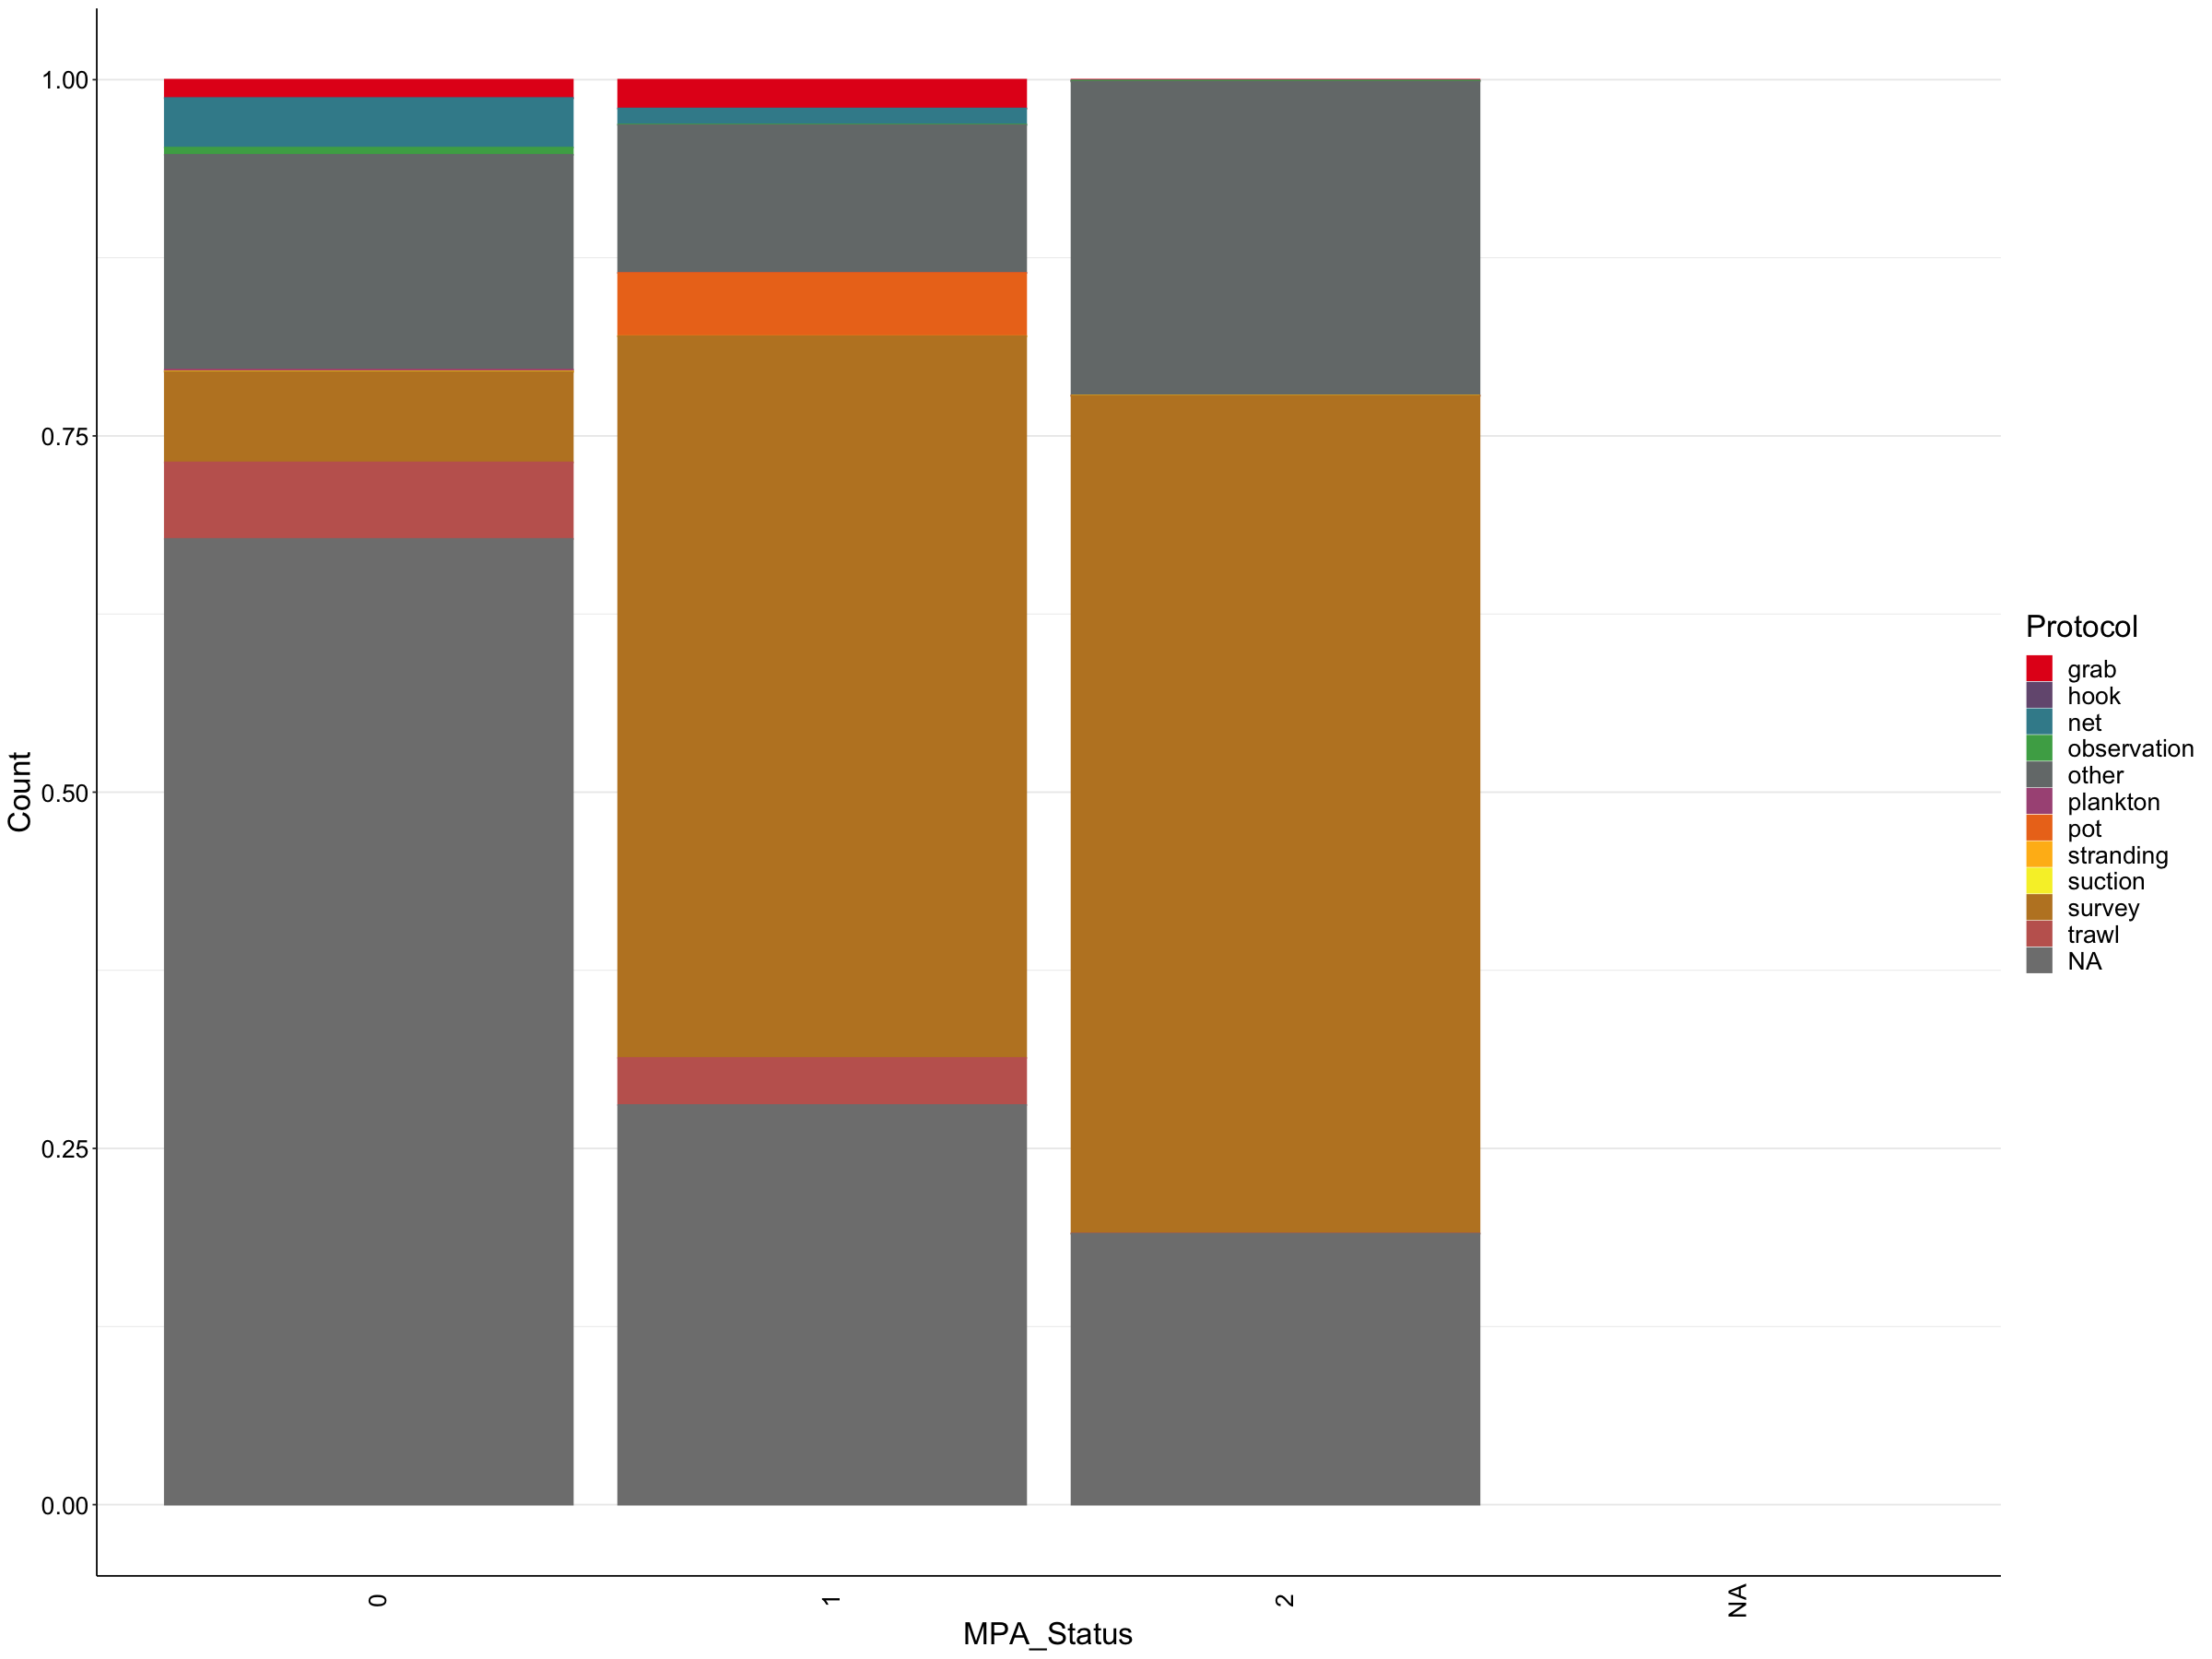

In [26]:
ggplot(samplingNums, aes(x=MPA_Status, color=Protocol, fill=Protocol, y=Count)) + 
geom_bar(position="fill", stat="identity")+
theme_bw()+
scale_fill_manual(values=mycolors, drop=TRUE)+
scale_color_manual(values=mycolors, drop=TRUE)+
scale_x_discrete(labels = function(x) str_wrap(x, width = 15))+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text.x=element_text(angle=90), axis.text=element_text(color="black"),
          text = element_text(size=20))

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


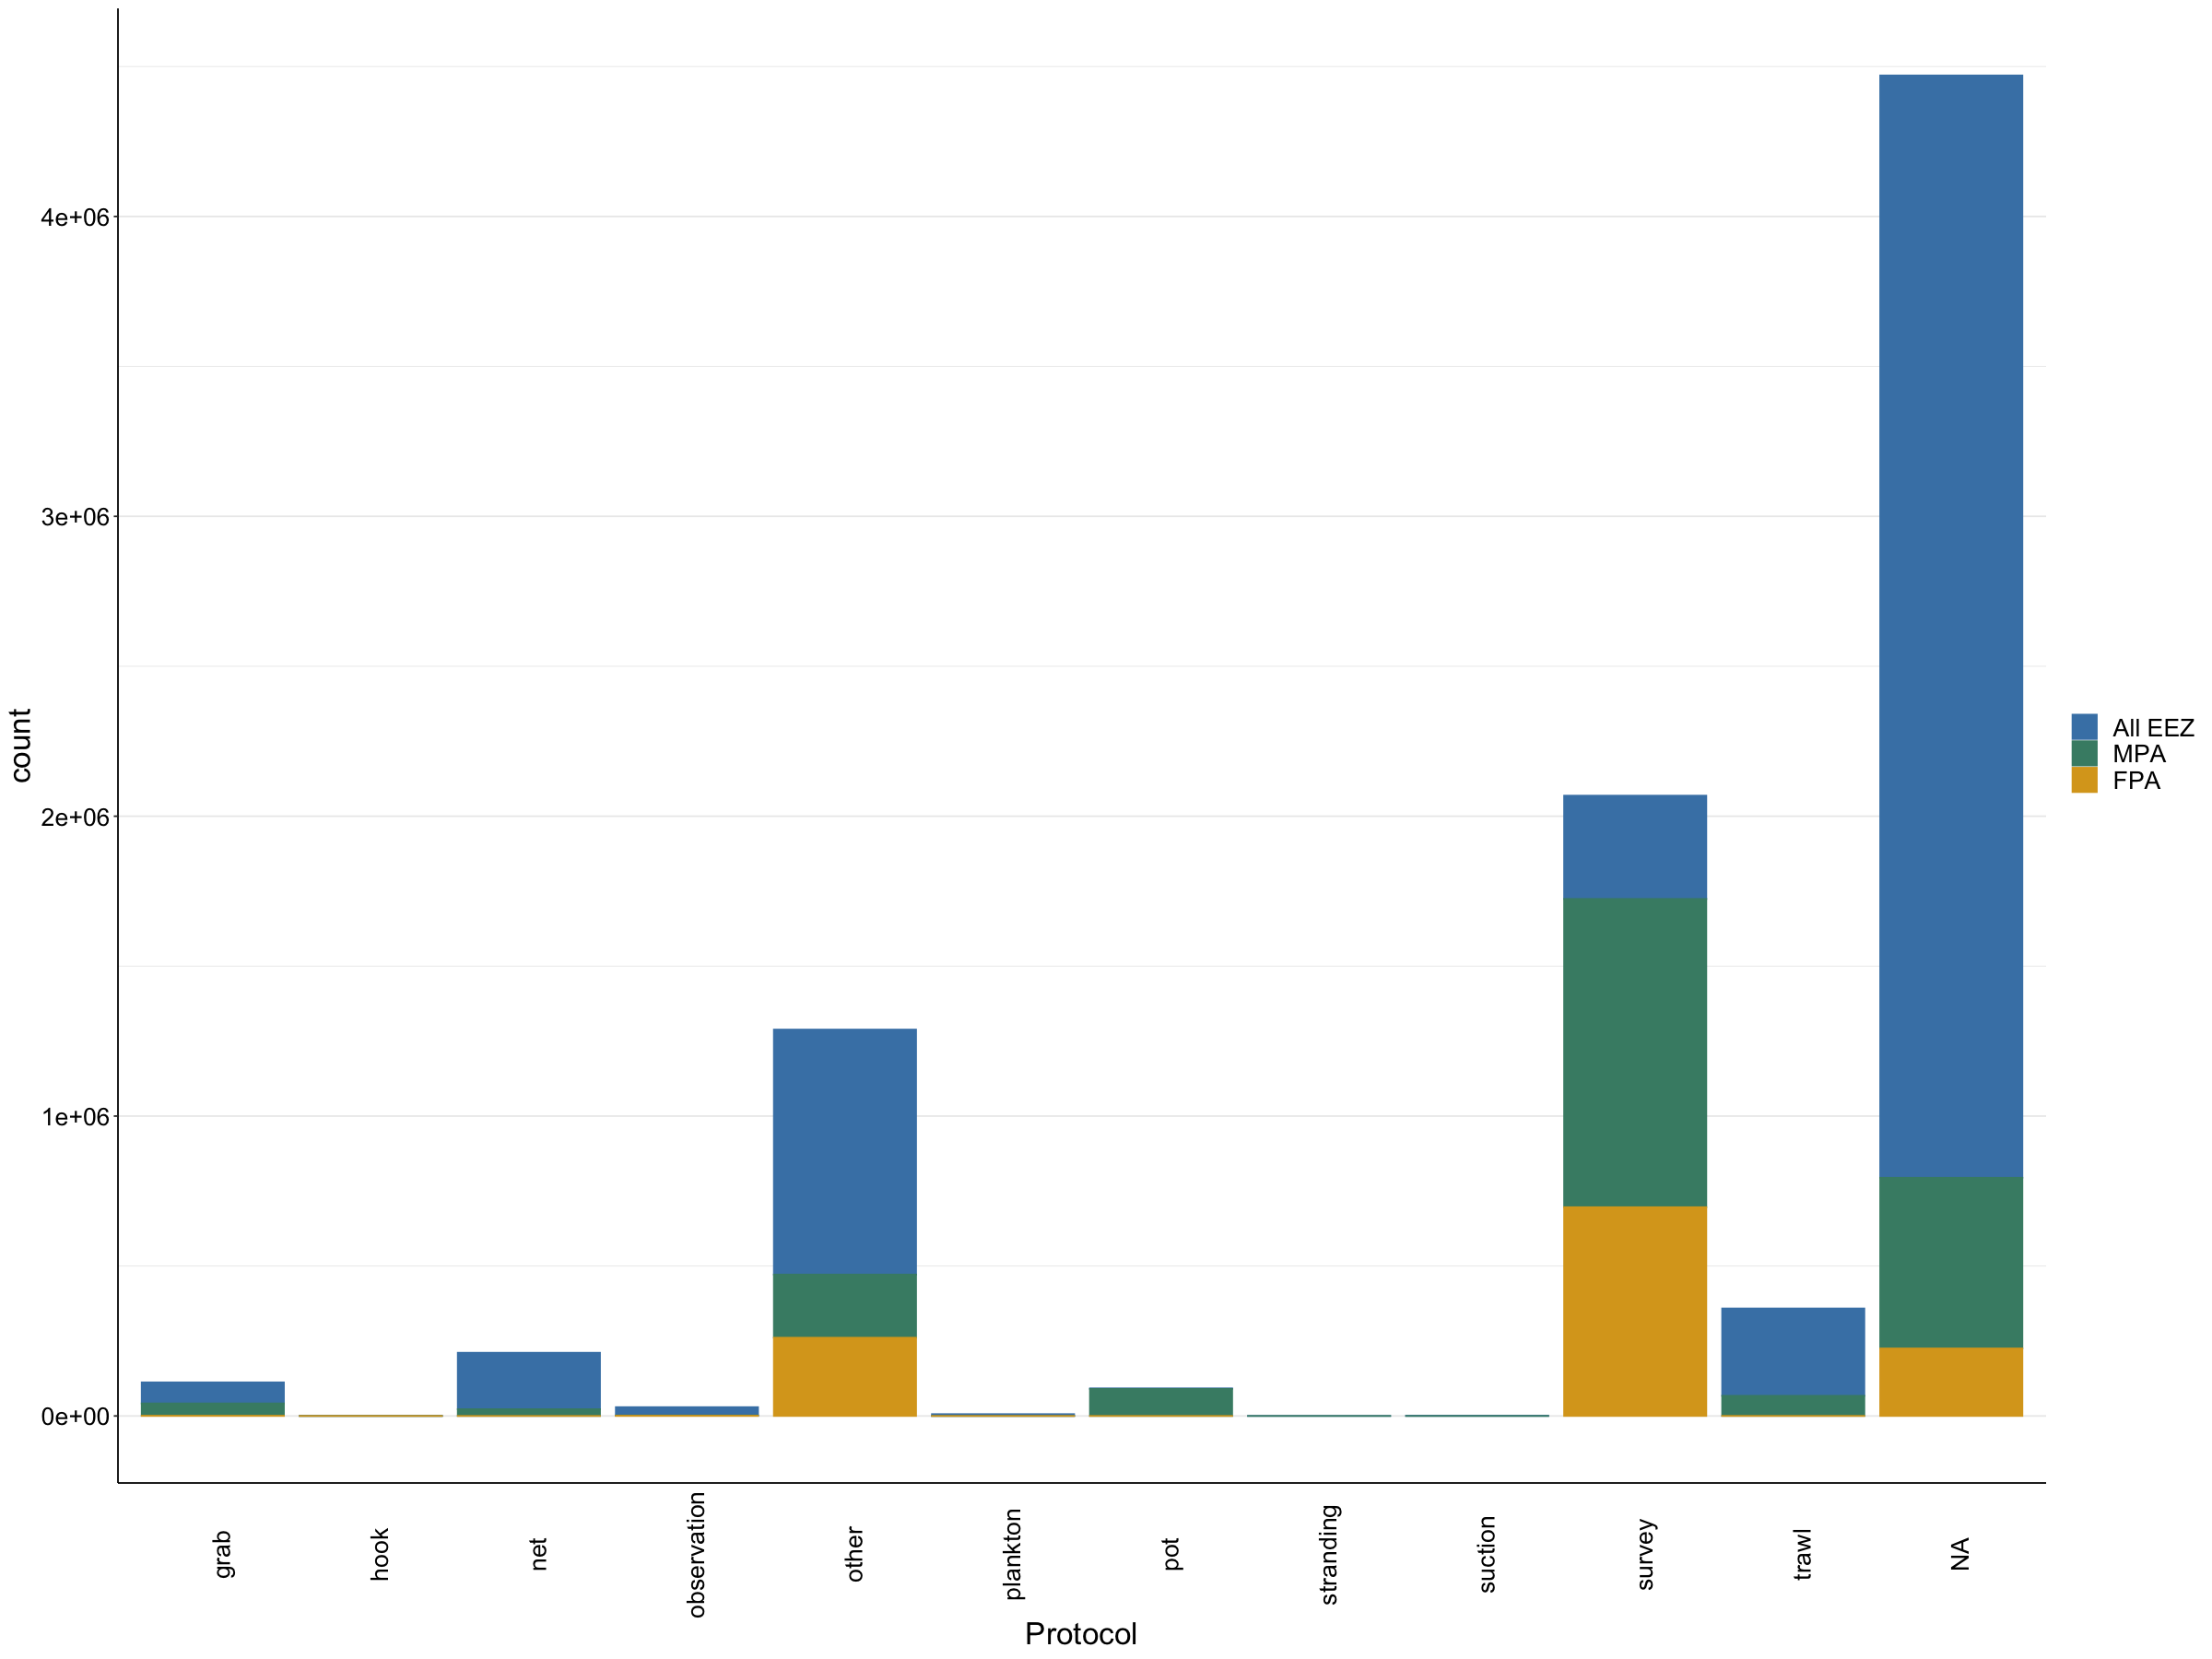

In [38]:
ggplot(obis_sample, aes(x=gen_protocol_SGW, color=MPA_Status, fill=MPA_Status)) + geom_histogram(, stat="count")+
theme_bw()+
scale_color_manual(values=c("#4682B4", "#458B74", "#DAA520"), labels=c("All EEZ", "MPA", "FPA"))+
scale_fill_manual(values=c("#4682B4", "#458B74", "#DAA520"), labels=c("All EEZ", "MPA", "FPA"))+
scale_x_discrete(labels = function(x) str_wrap(x, width = 15))+
xlab("Protocol")+
theme(legend.position="right", legend.title=element_blank(), panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text.x=element_text(angle=90), axis.text=element_text(color="black"),
          text = element_text(size=20))


In [39]:
ggsave("~/Documents/Lenfest/Plot_CSV_v2/protocol_frequency_nas.pdf", width=10, height=10)

In [ ]:
Finished figures
Trawl
pot
plankton
grab
net
observation

Too few samples to do comparison accumulation curves: 
hook
aerial
stranding
suction

In [45]:
category=as.data.frame(obis_sample[obis_sample$gen_protocol_SGW=="grab",])


In [46]:
#separate MPAs and FPAs
category_MPA=category[category$MPA_Status==1,]
category_FPA=category[category$MPA_Status==2,]

In [47]:
#remove unnecessary columns
category=category[,c(4,238)]
category_MPA=category_MPA[,c(4,238)]
category_FPA=category_FPA[,c(4,238)]

In [48]:
category$occurrence=1
category_MPA$occurrence=1
category_FPA$occurrence=1

In [49]:
# this is the number of sampling units inside and outside MPAs for samples as sites
NROW(category)
NROW(category_MPA)
NROW(category_FPA)

[1] 112026

[1] 41109

[1] 819

In [50]:
category_sum=summarise(group_by(category, scientificName), sum(occurrence))
category_MPA_sum=summarise(group_by(category_MPA, scientificName), sum(occurrence))
category_FPA_sum=summarise(group_by(category_FPA, scientificName), sum(occurrence))

In [51]:
colnames(category_sum)=c("scientificName", "occurrence")
colnames(category_MPA_sum)=c("scientificName", "occurrence")
colnames(category_FPA_sum)=c("scientificName", "occurrence")

In [52]:
category_incidence_samp = (c(112026, category_sum$occurrence))
category_MPA_incidence_samp = (c(41109, category_MPA_sum$occurrence))
category_FPA_incidence_samp = (c(819, category_FPA_sum$occurrence))


In [53]:
category_MPAs=list(0)

In [54]:
category_MPAs$All=category_incidence_samp
category_MPAs$MPA=category_MPA_incidence_samp
category_MPAs$FPA=category_FPA_incidence_samp

In [55]:
category_MPAs[1]=NULL

In [56]:
gsrich=iNEXT(category_MPAs, q = 0, datatype = "incidence_freq")

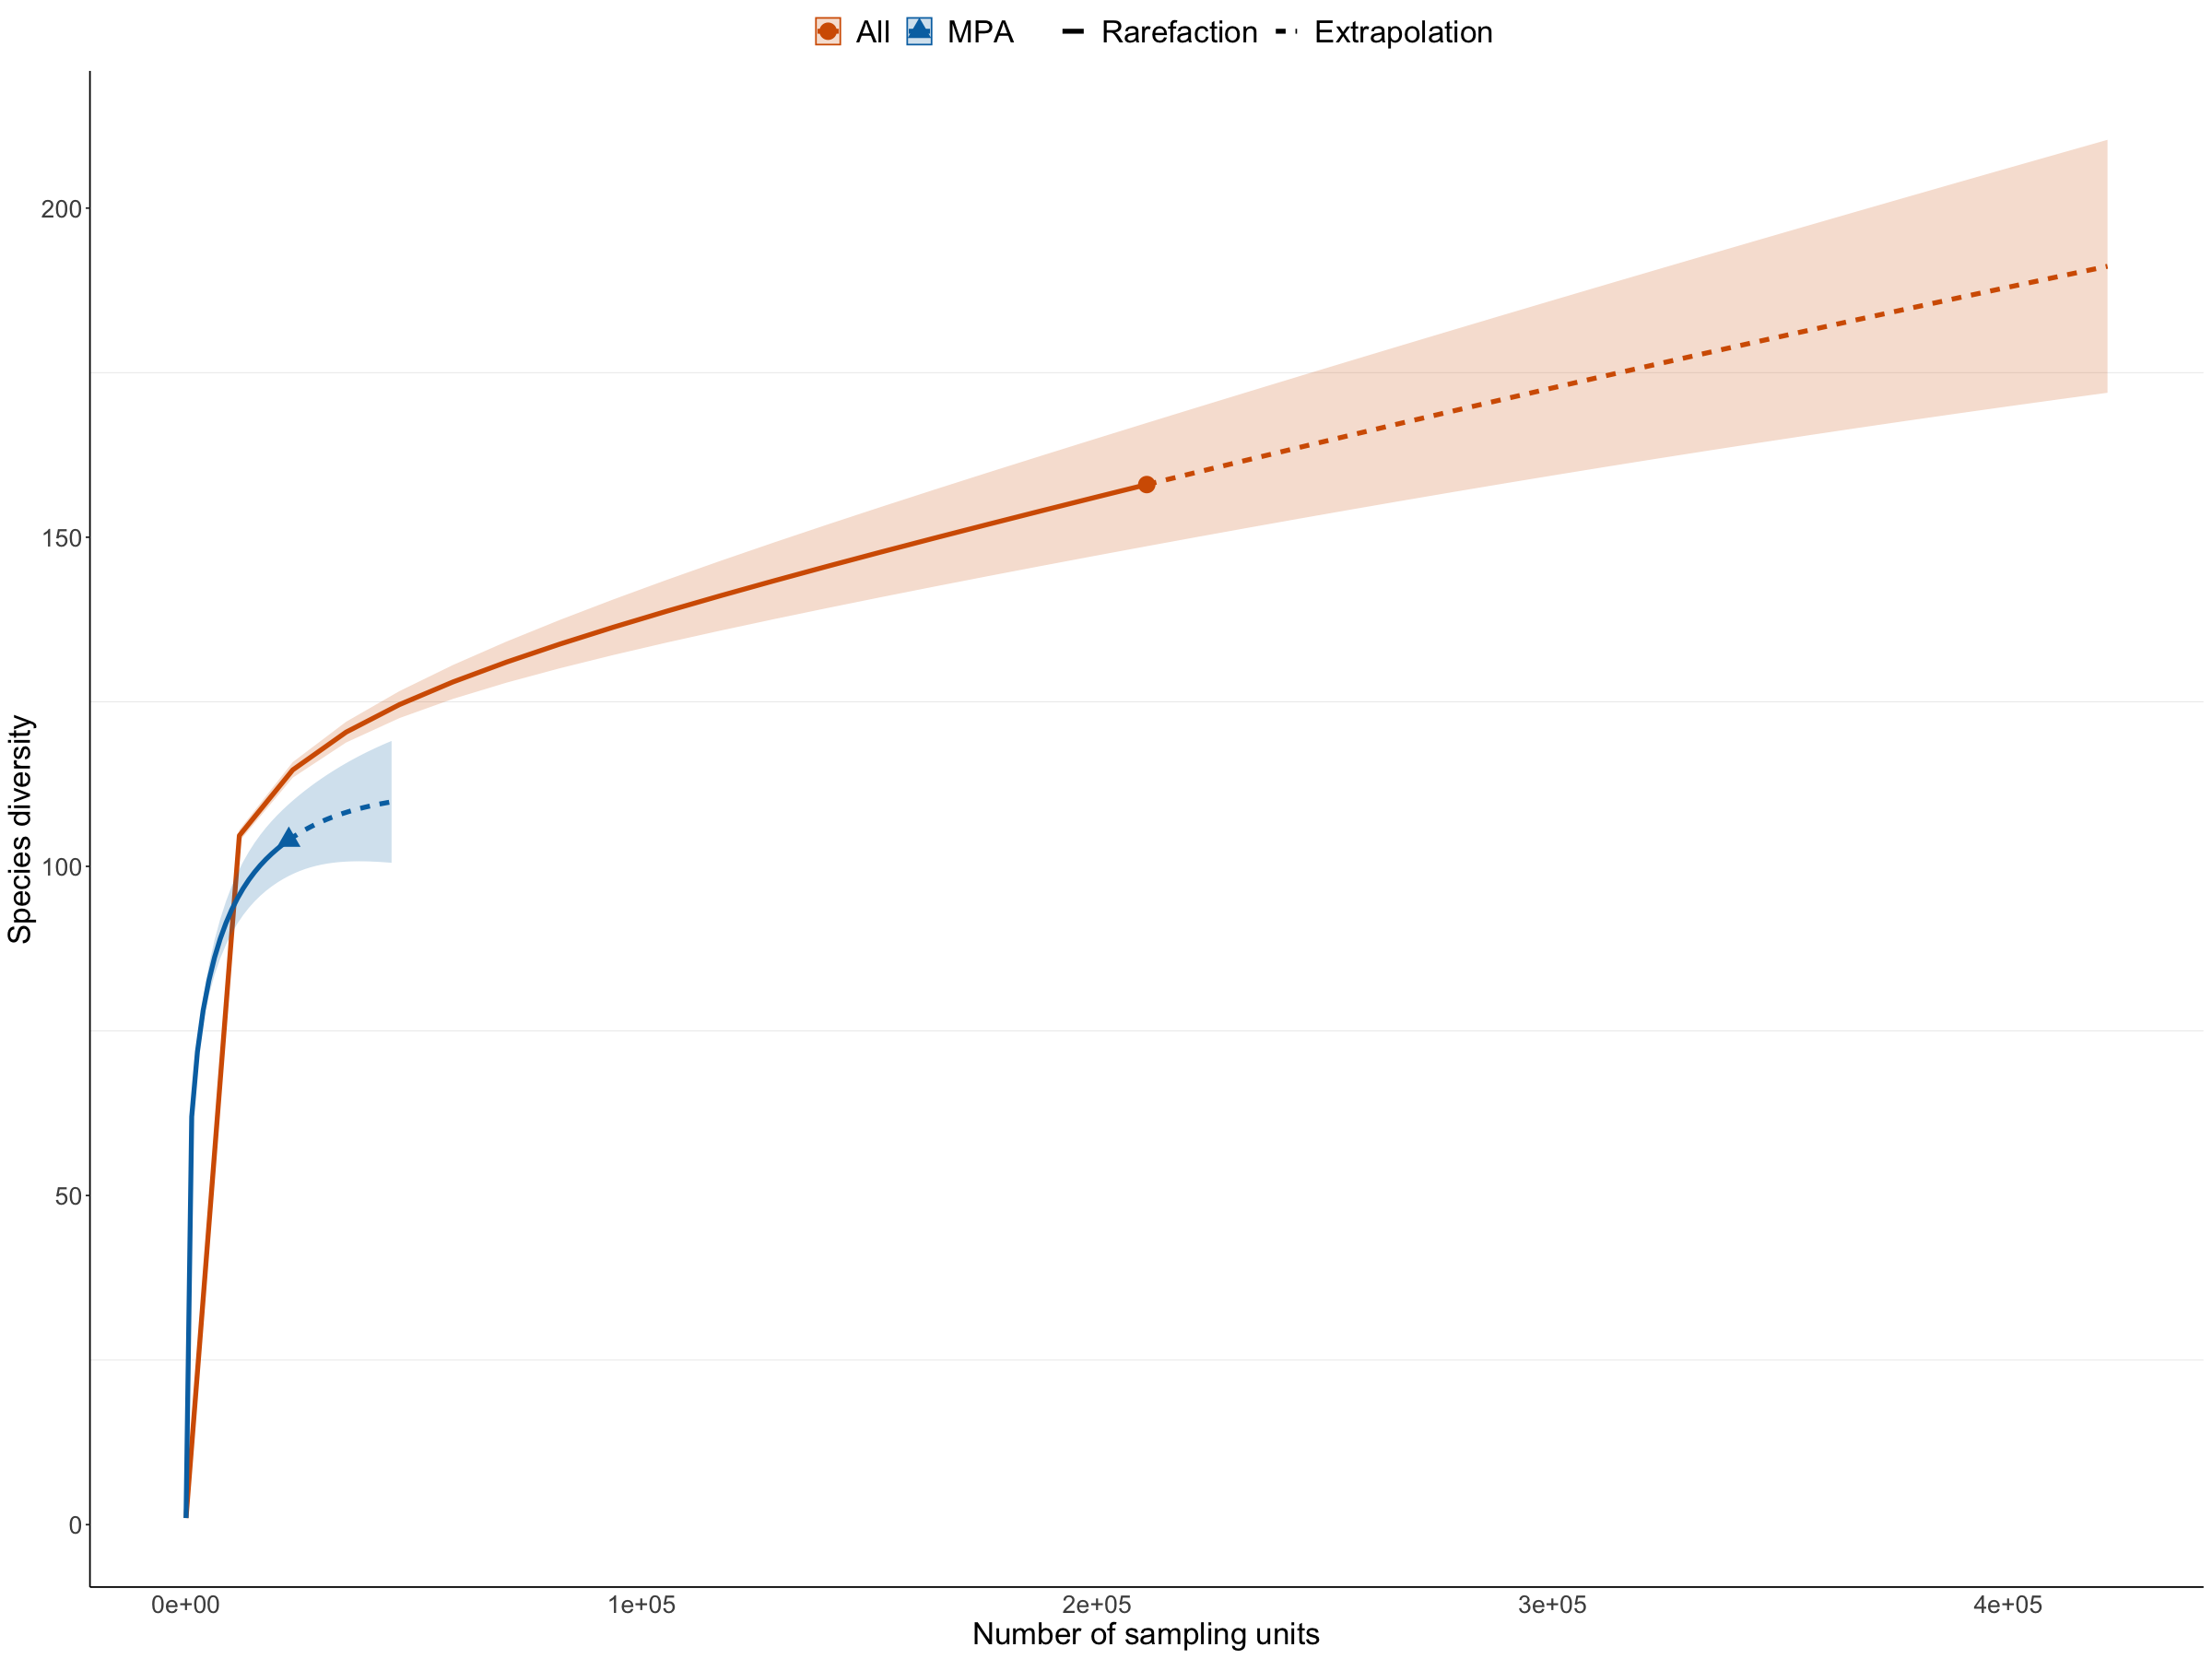

In [282]:
##net
ggiNEXT(gsrich)+
theme_bw()+
theme(legend.position="top", legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=20))

In [283]:
ggsave("~/Documents/Lenfest/Plot_CSV_v2/net_curve.pdf", width=10, height=10)

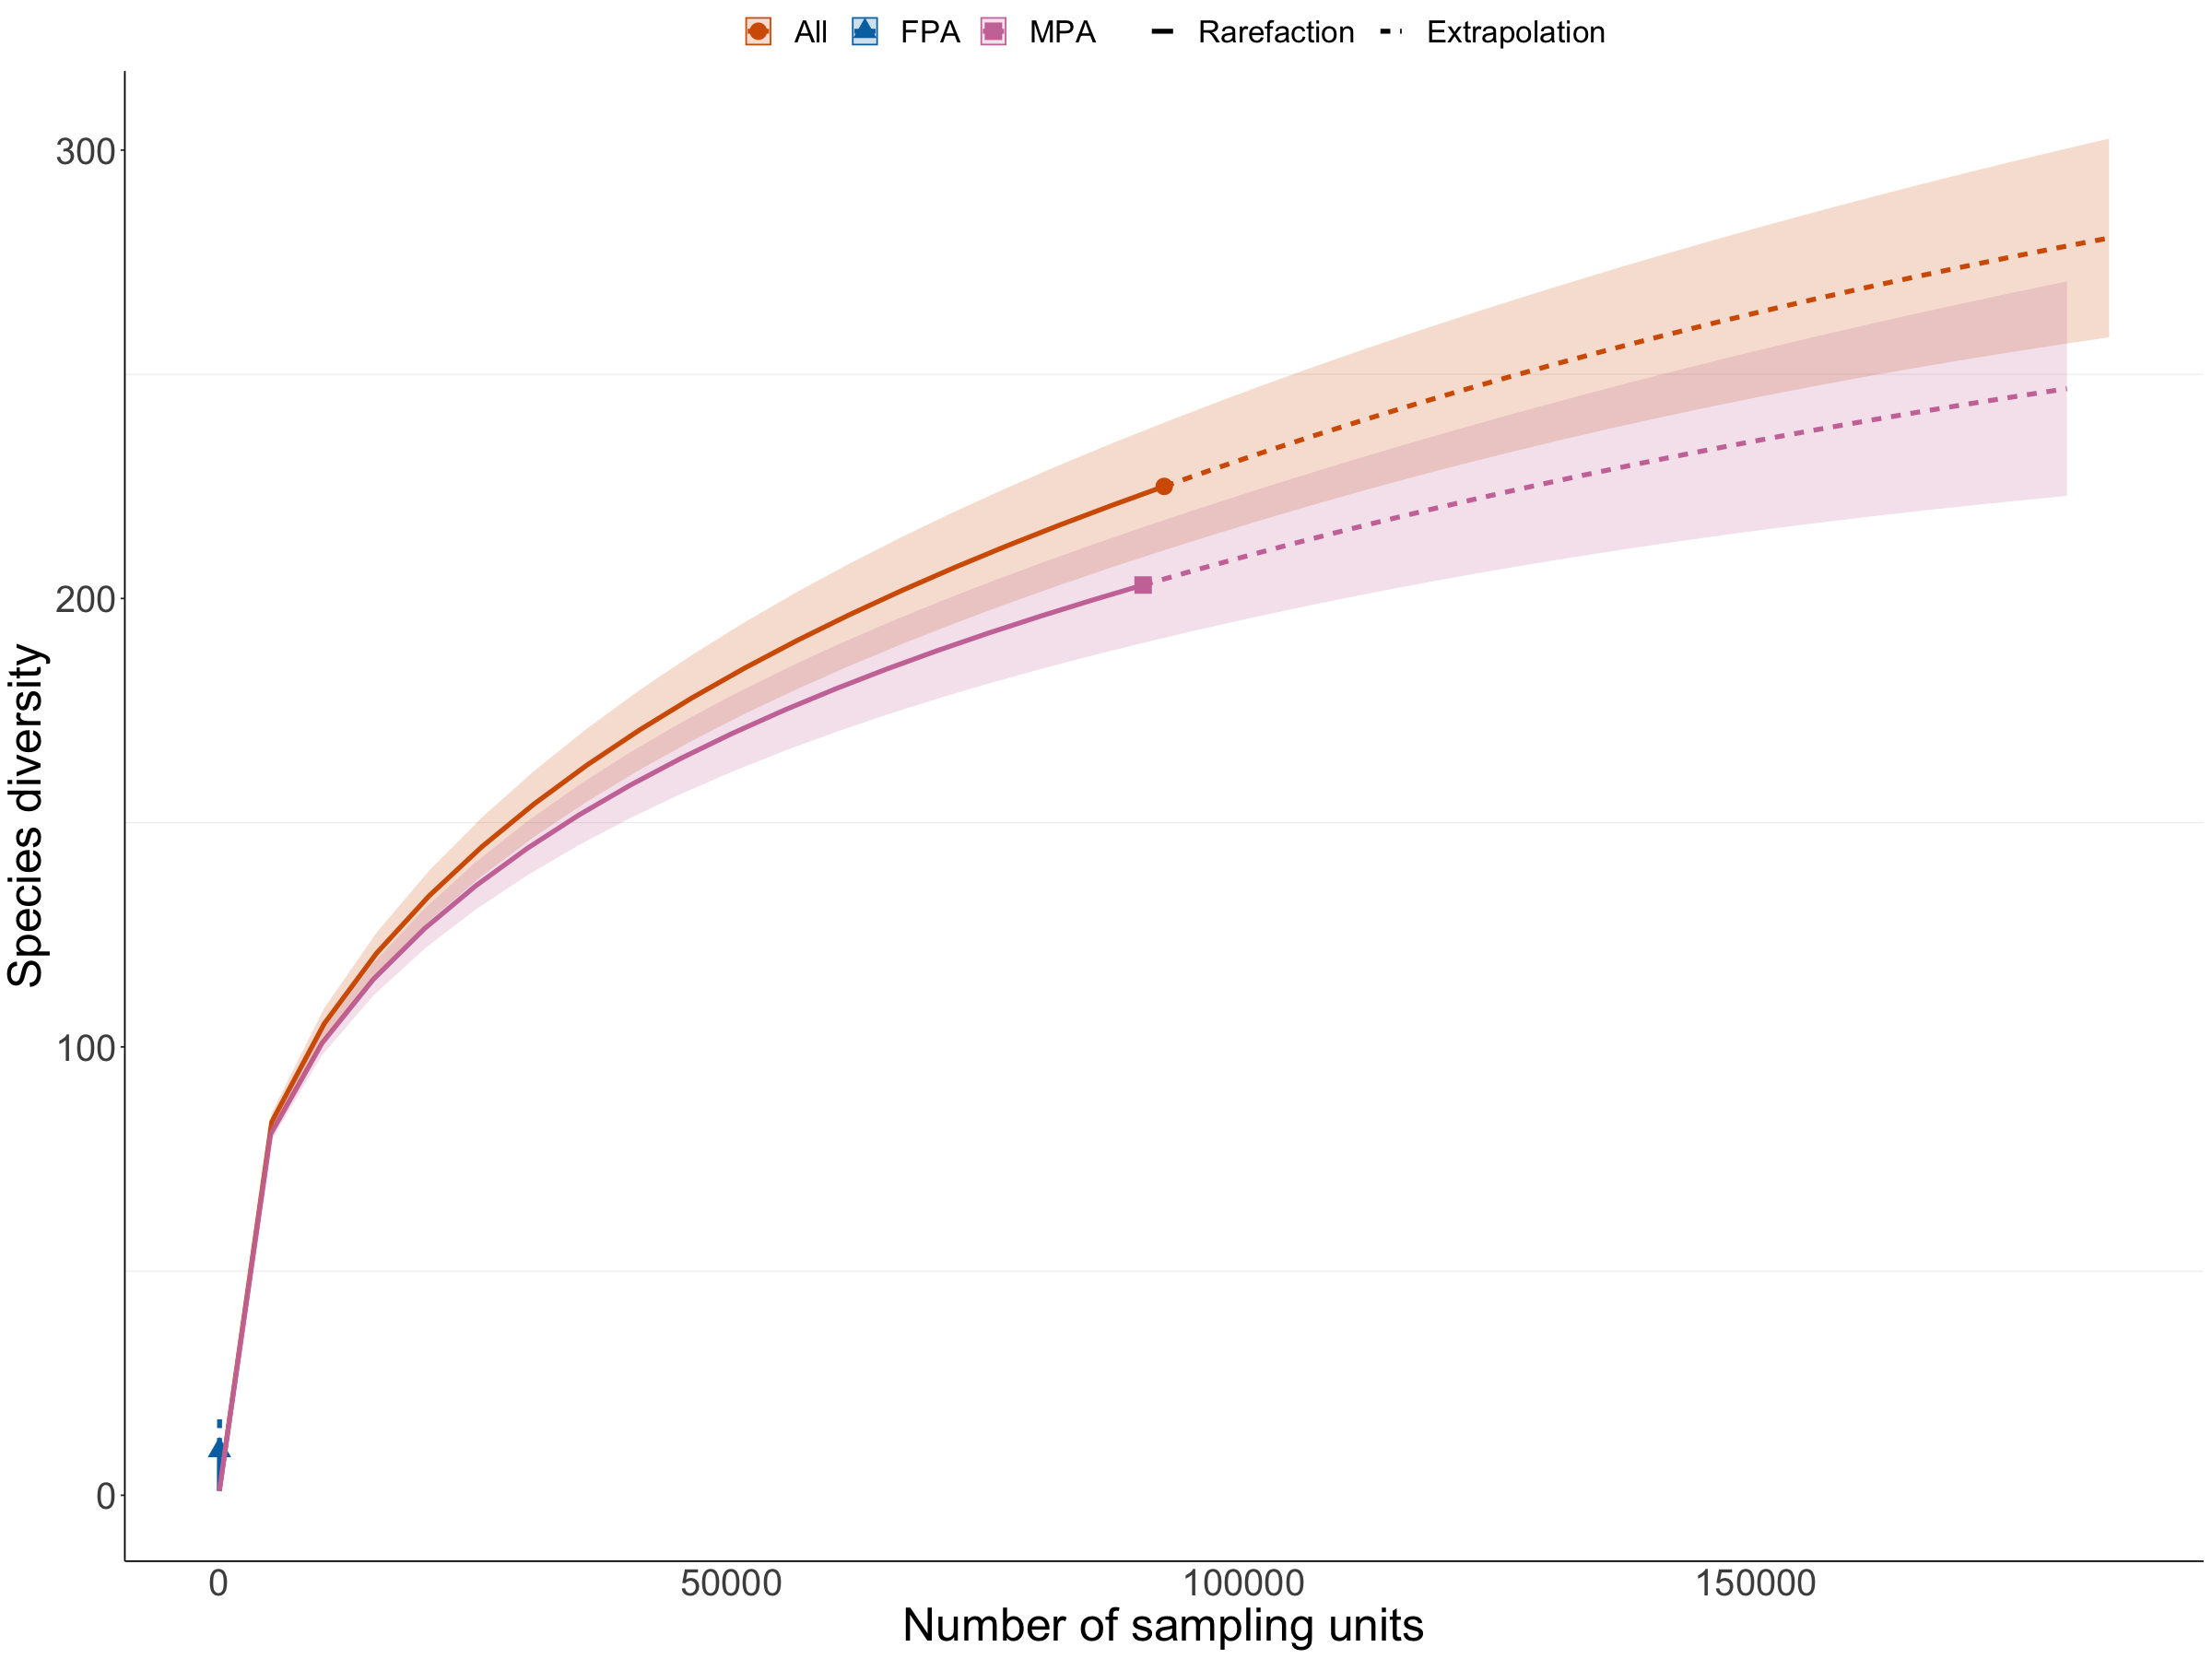

In [264]:
##pot
ggiNEXT(gsrich)+
theme_bw()+
theme(legend.position="top", legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=30))

In [265]:
ggsave("~/Documents/Lenfest/Plot_CSV_v2/pot_curve.pdf", width=10, height=10)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



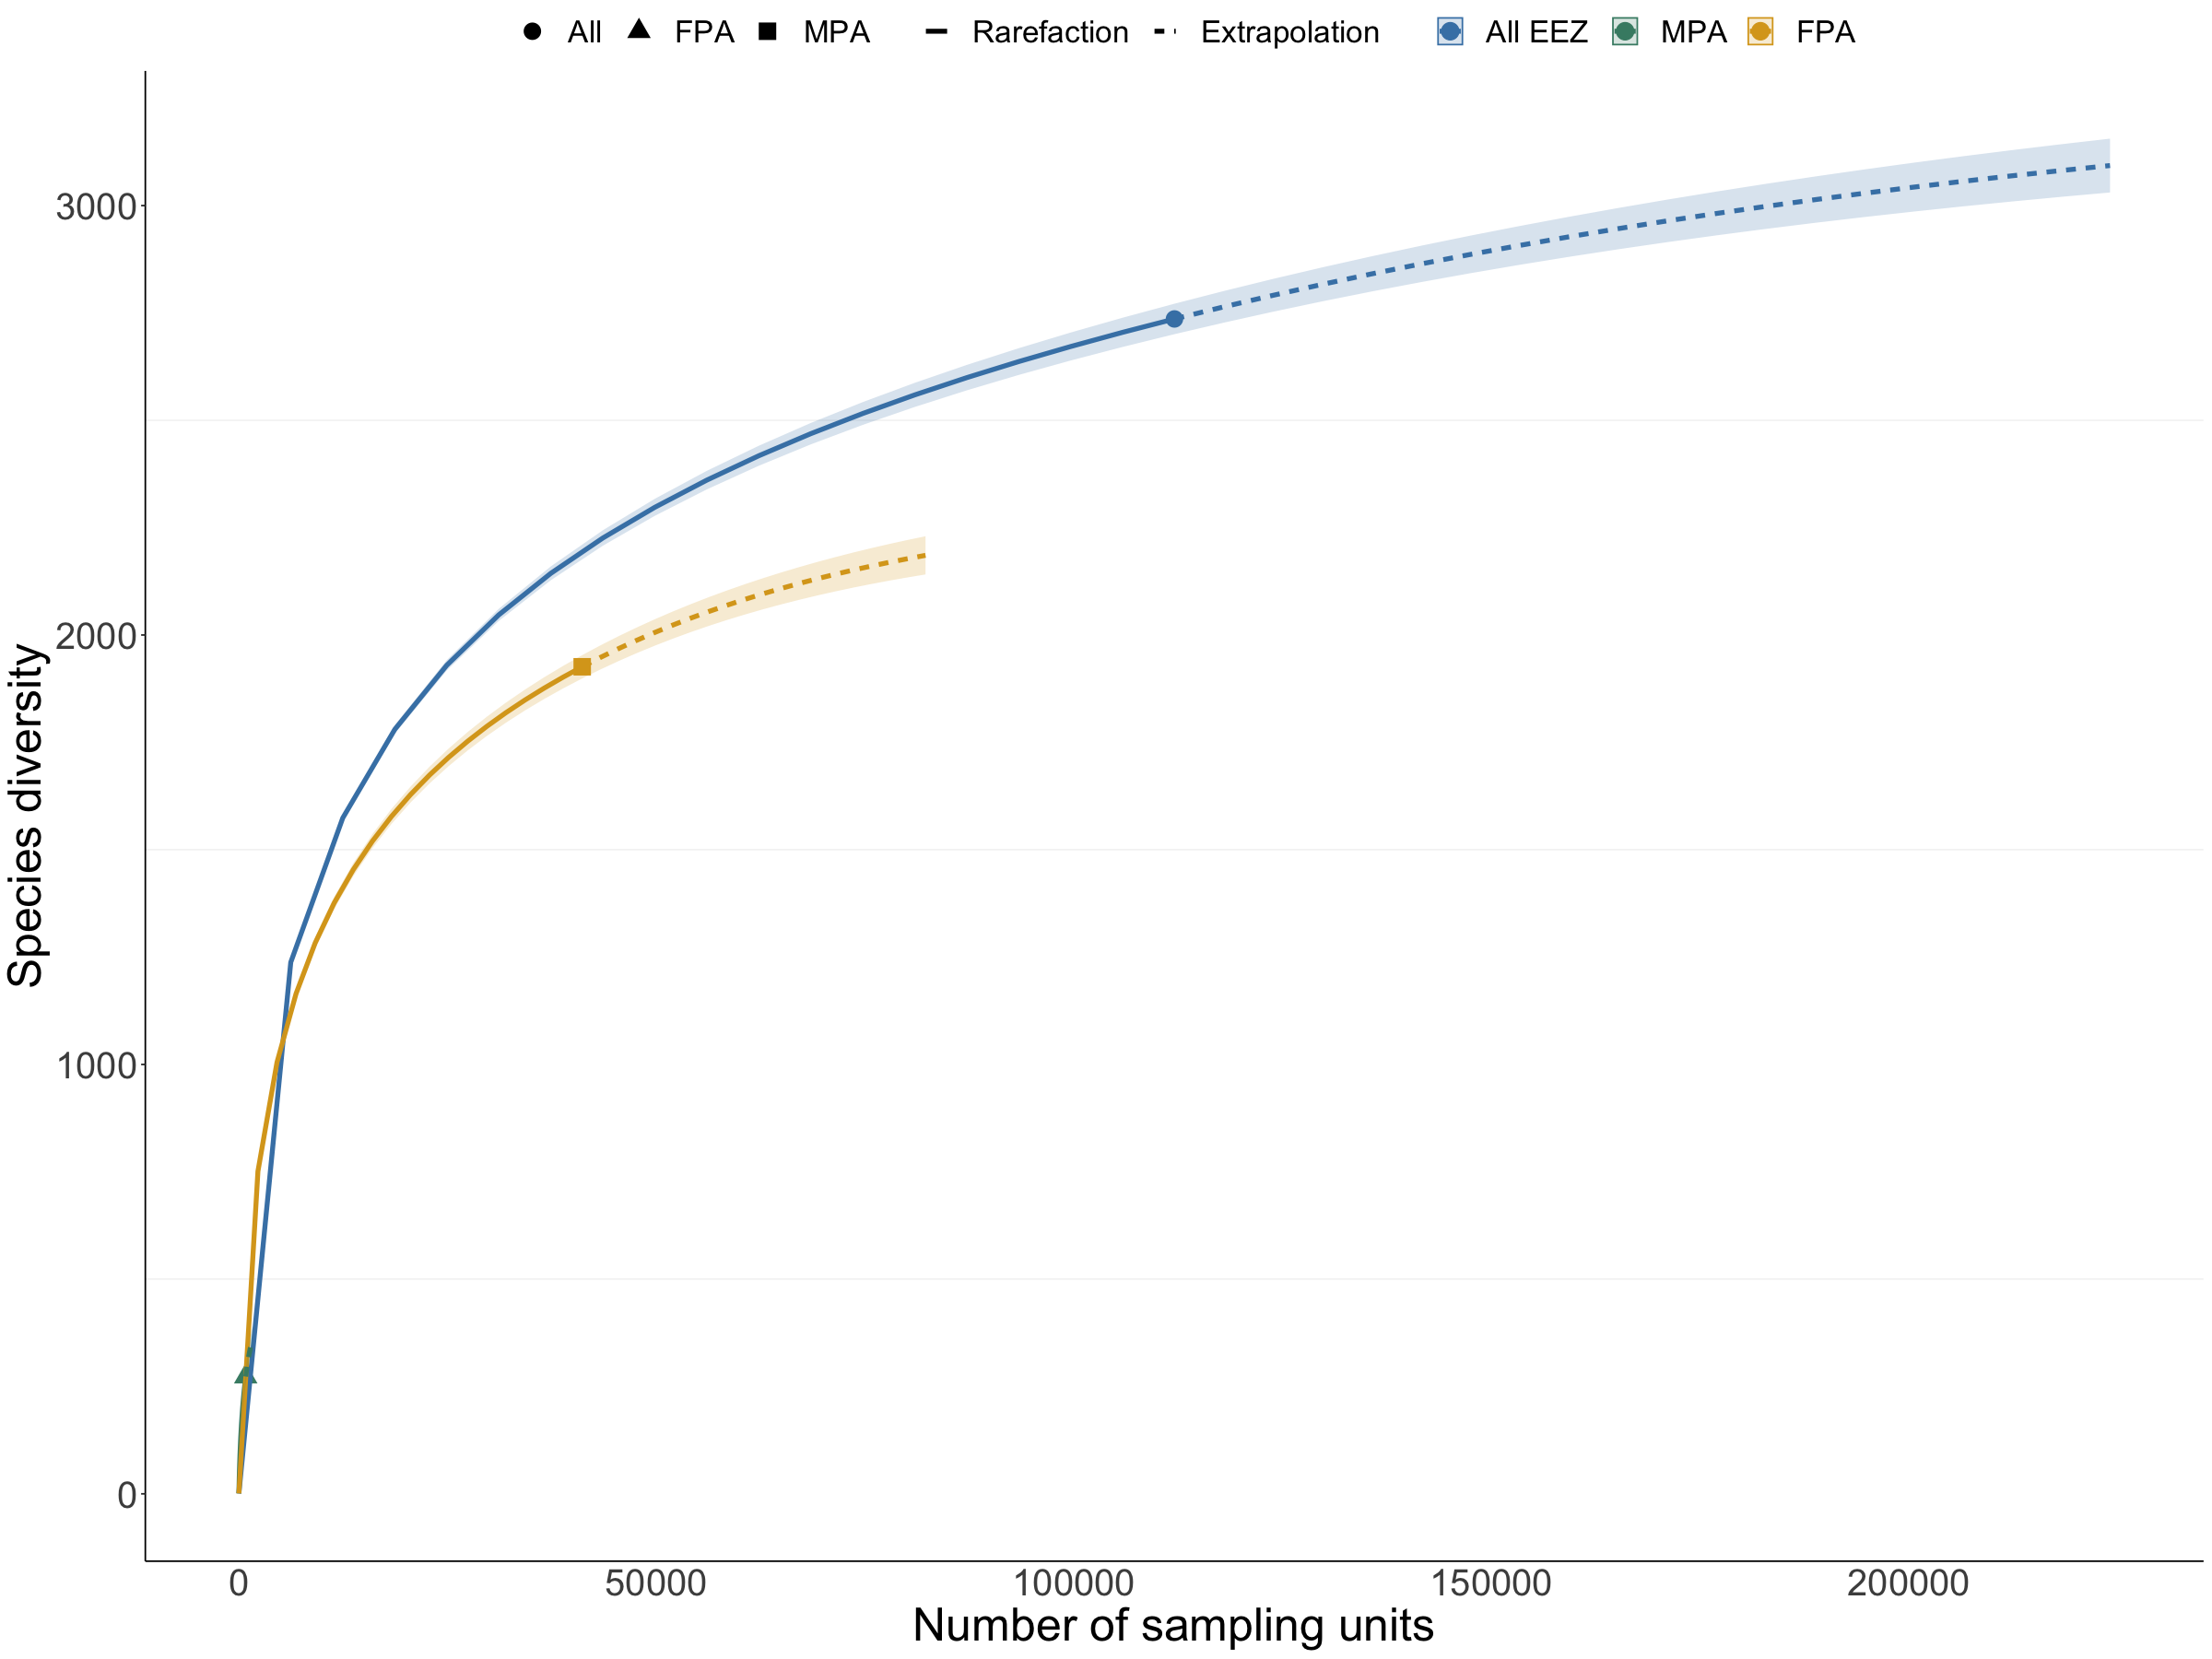

In [57]:
##grab
ggiNEXT(gsrich)+
theme_bw()+
scale_color_manual(values=c("#4682B4", "#458B74", "#DAA520"), labels=c("All EEZ", "MPA", "FPA"))+
scale_fill_manual(values=c("#4682B4", "#458B74", "#DAA520"), labels=c("All EEZ", "MPA", "FPA"))+
theme(legend.position="top", legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=30))

In [297]:
ggsave("~/Documents/Lenfest/Plot_CSV_v2/grab_curve.pdf", width=10, height=10)

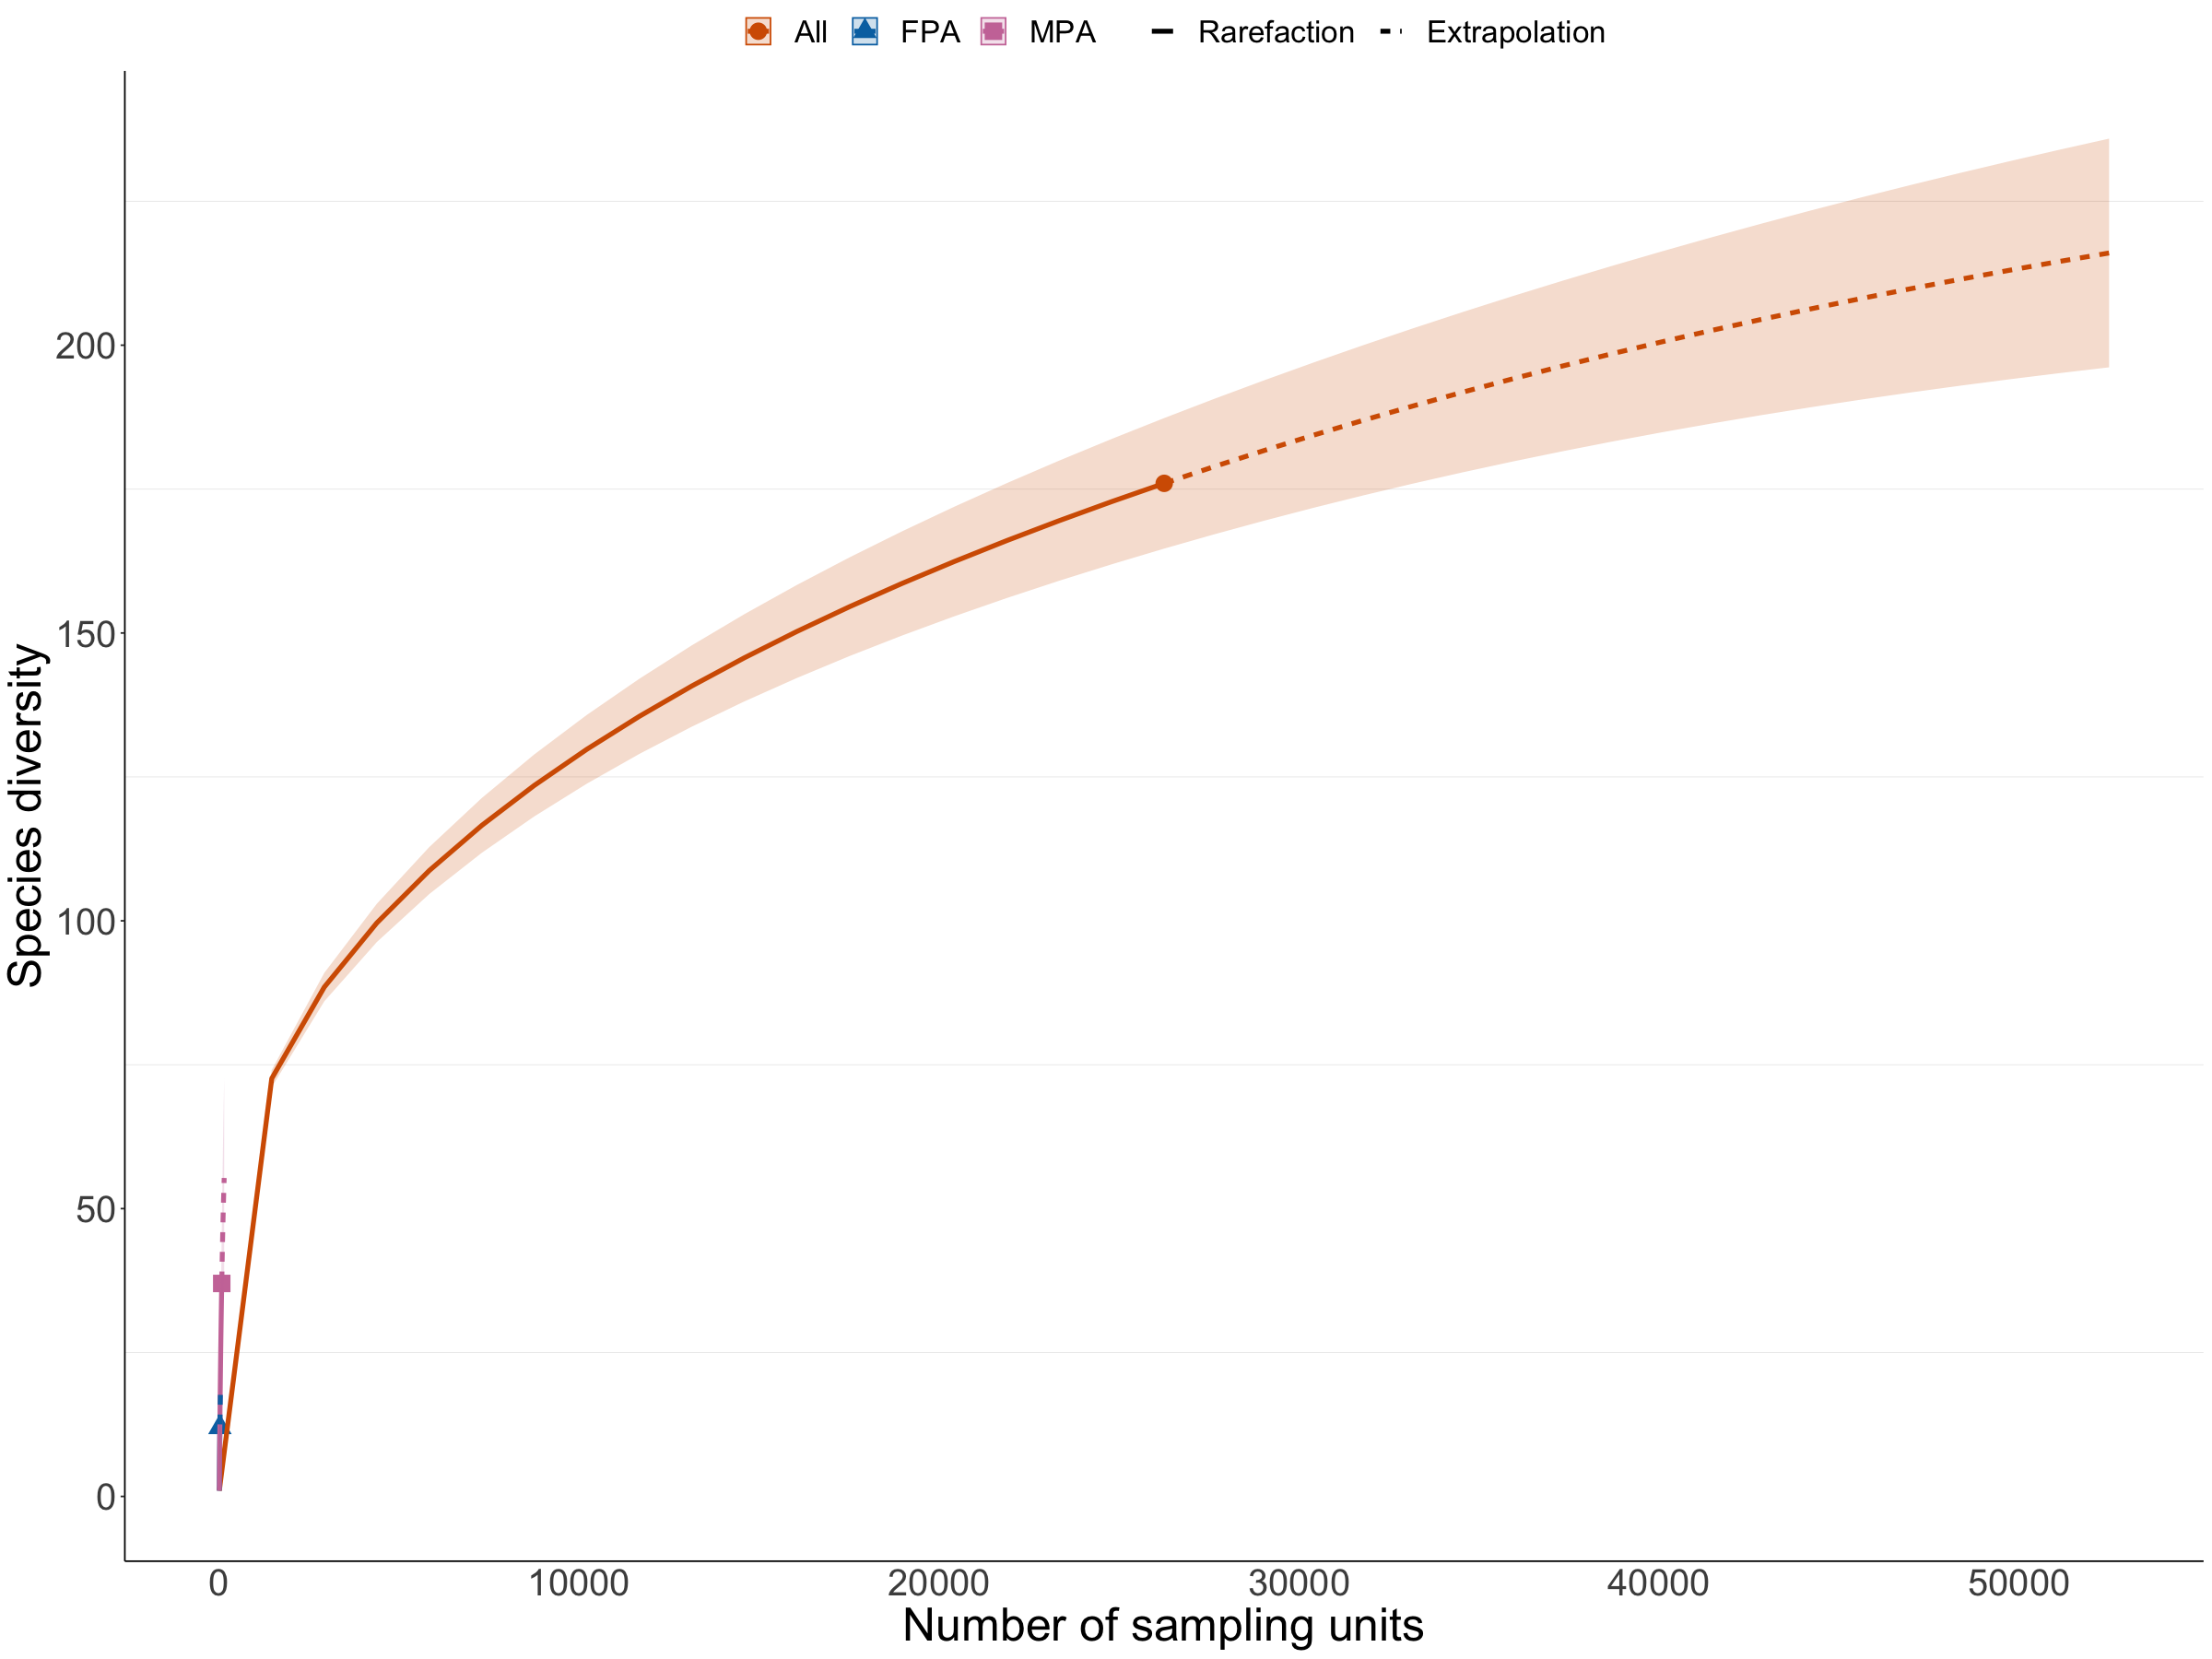

In [335]:
##observation
## survey sampling level at samples (observations)
ggiNEXT(gsrich)+
theme_bw()+
theme(legend.position="top", legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=30))

In [336]:
ggsave("~/Documents/Lenfest/Plot_CSV_v2/observation_curve.pdf", width=10, height=10)

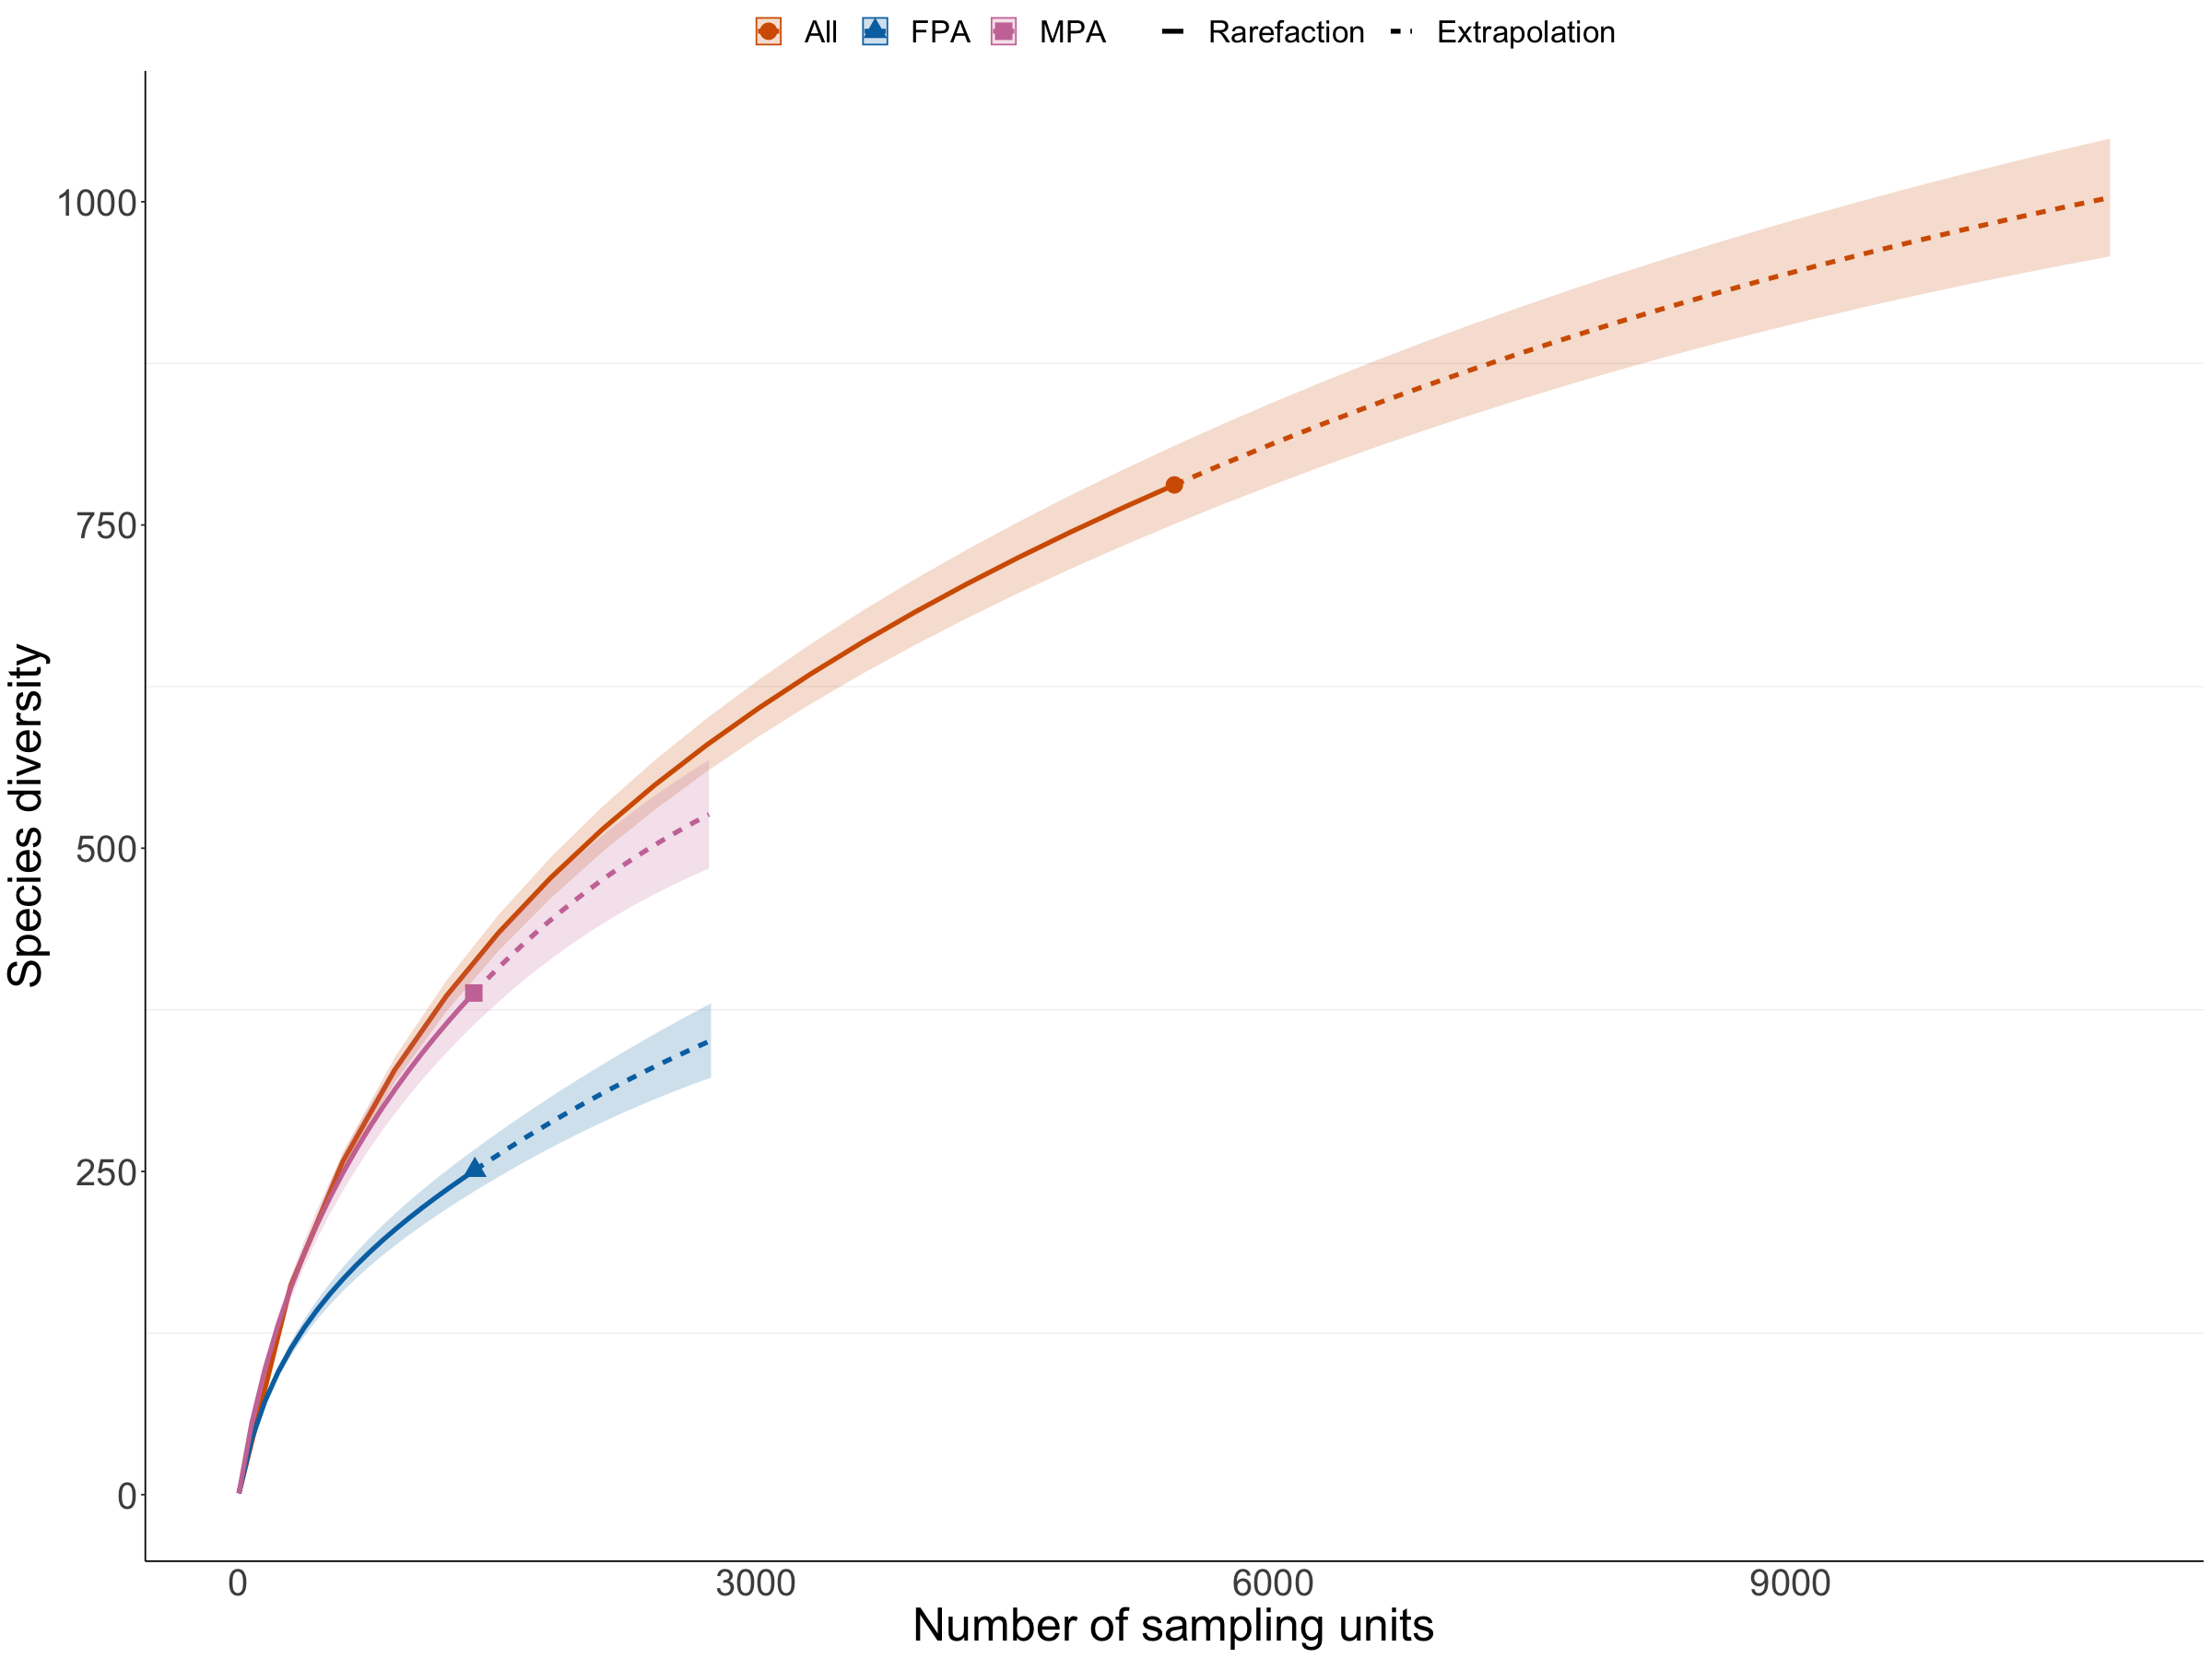

In [320]:
##scuba
## survey sampling level at samples (observations)
ggiNEXT(gsrich)+
theme_bw()+
theme(legend.position="top", legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=30))

In [321]:
ggsave("~/Documents/Lenfest/Plot_CSV_v2/scuba_curve.pdf", width=10, height=10)

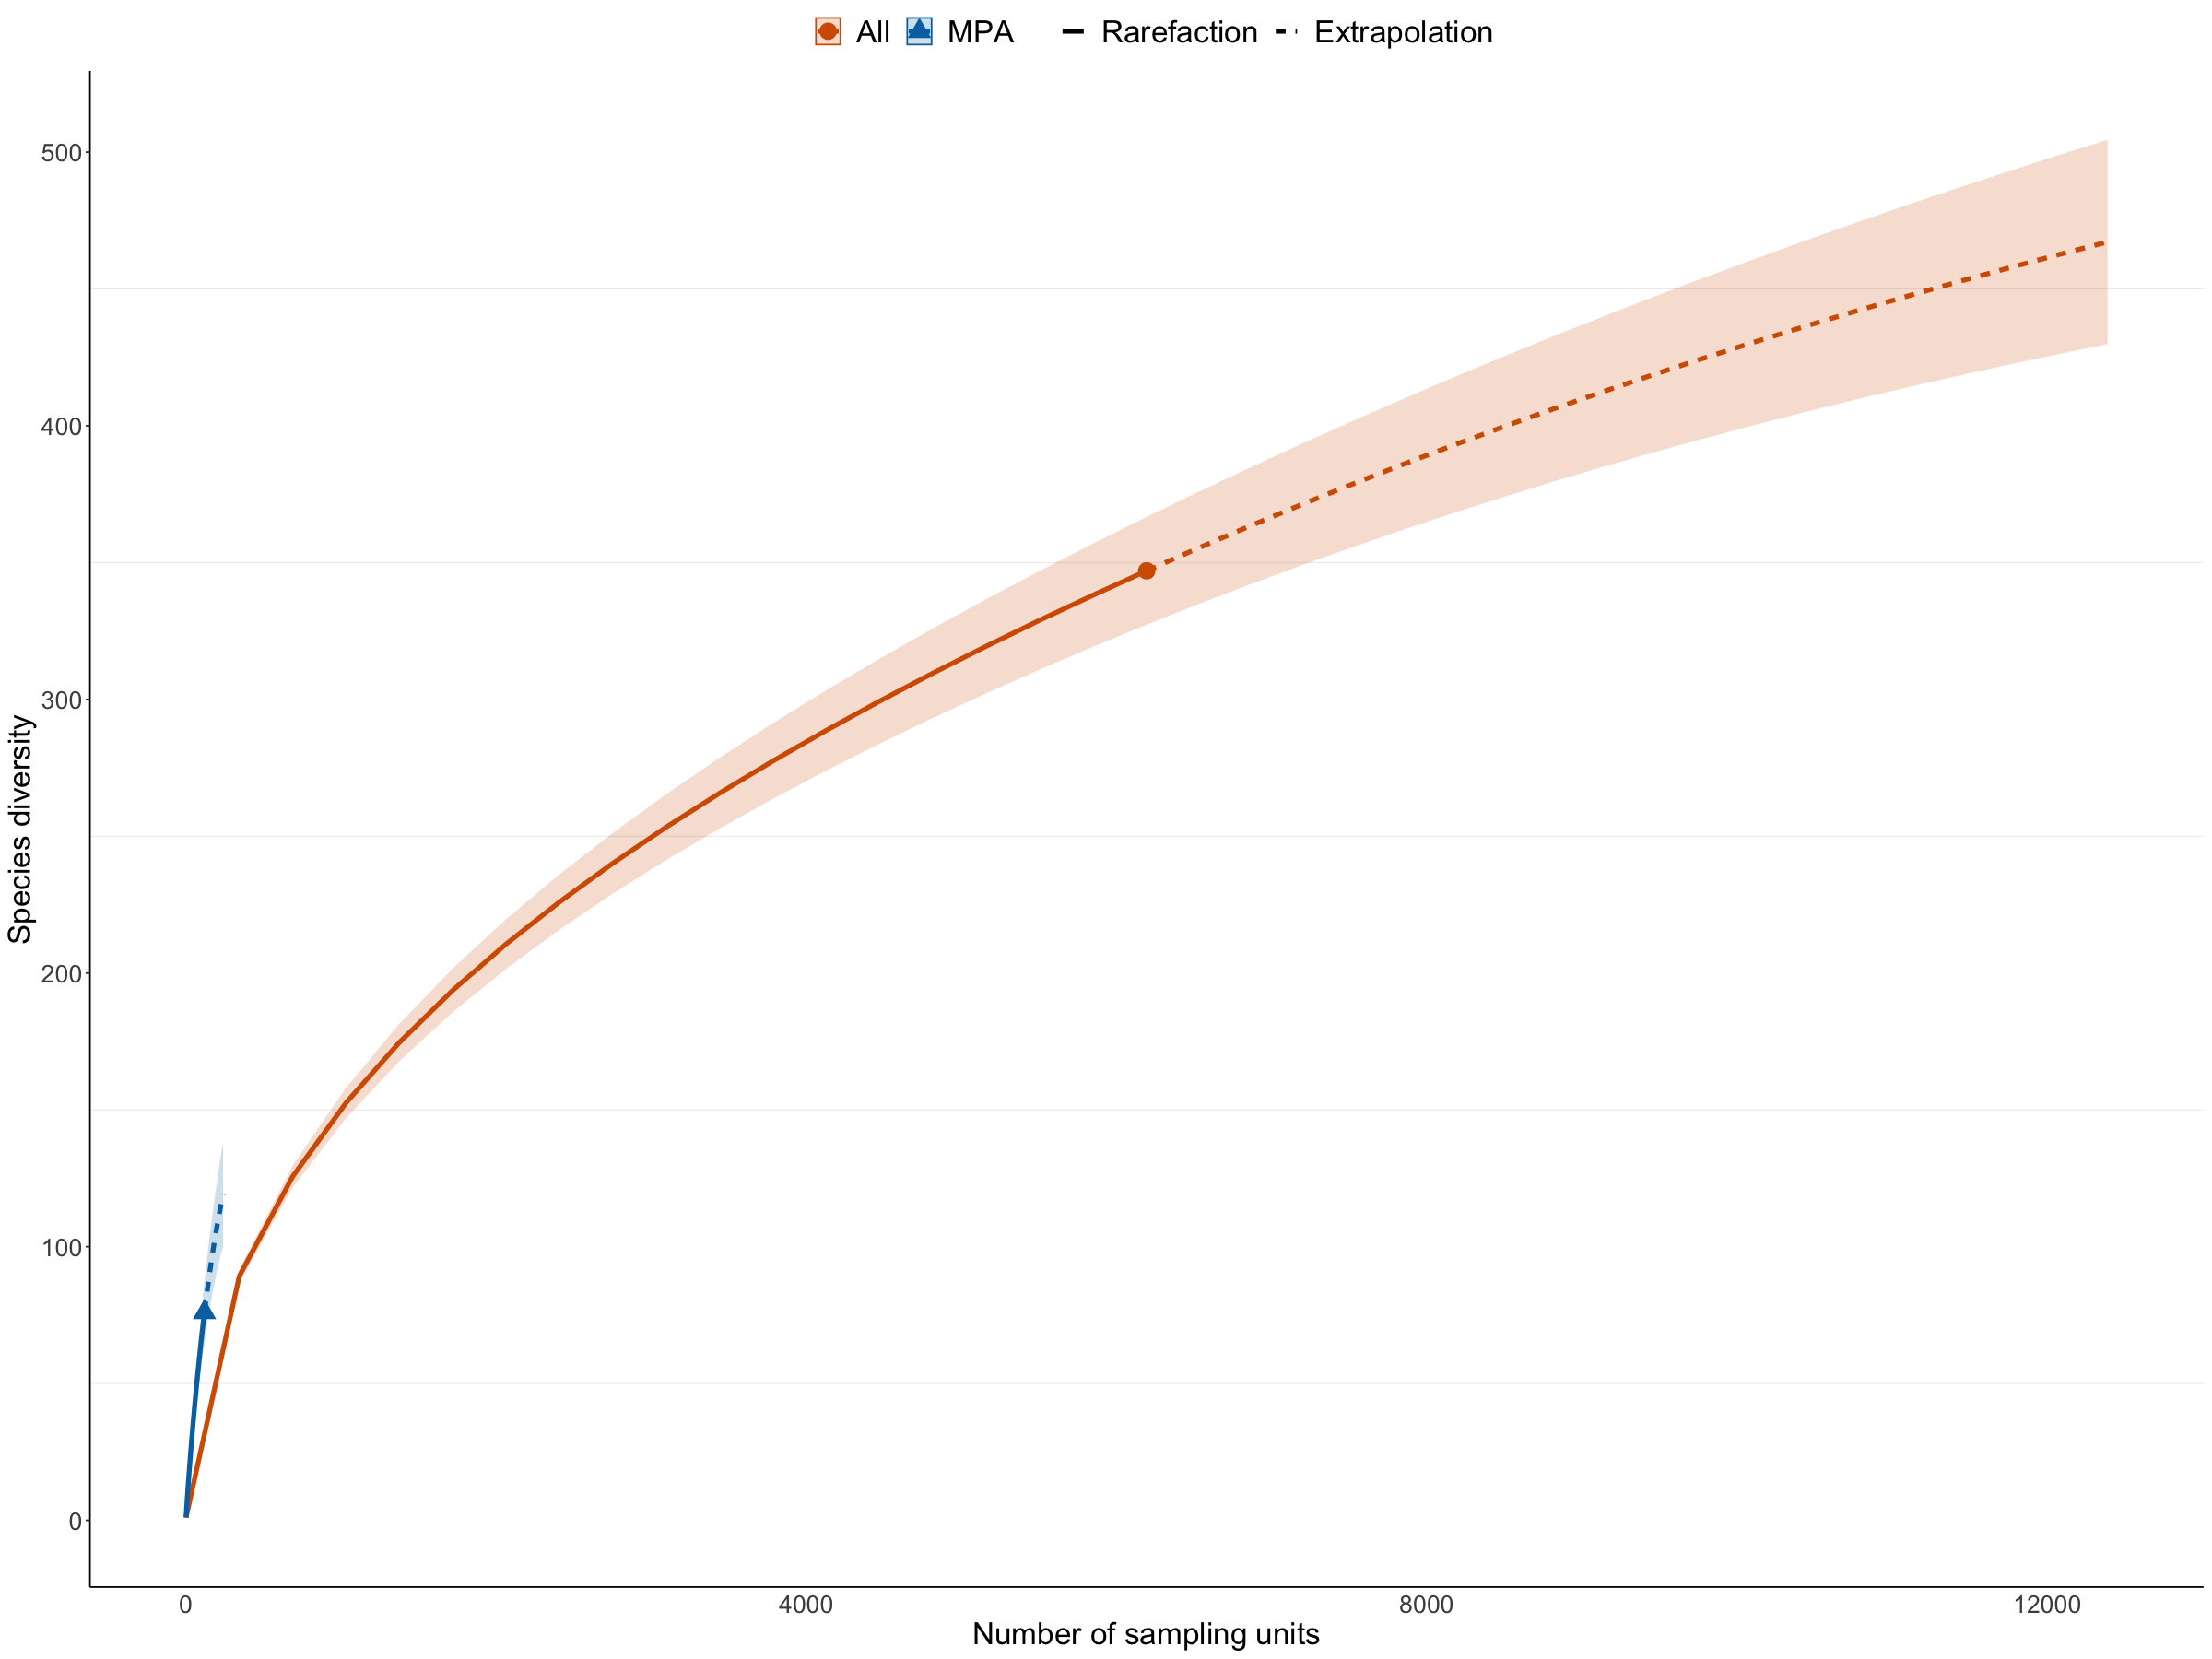

In [250]:
##plankton

## survey sampling level at samples (observations)
ggiNEXT(gsrich)+
theme_bw()+
theme(legend.position="top", legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=20))

In [251]:
ggsave("~/Documents/Lenfest/Plot_CSV_v2/plankton_curve.pdf", width=10, height=10)

In [ ]:
Running on Unity


#!/bin/bash
#SBATCH --mail-type=ALL
#SBATCH -c 4  # Number of Cores per Task
#SBATCH --mem=60  # Requested Memory
#SBATCH -p cpu-preempt  # Partition
#SBATCH -c 64  # Number of CPUs
#SBATCH -o slurm-%j.out  # %j = job ID

conda activate /home/sarah_gignouxwolfsohn_uml_edu/.conda/envs/jupyter-r

Rscript accumulation.R


In [ ]:
scale_y_log10()

In [12]:
load("~/Documents/Lenfest/Plot_CSV_v2/survey_gsrich.rdata")

In [20]:
## survey sampling level at samples (observations)
plot=ggiNEXT(gsrich)+
theme_bw()+
theme(legend.position="top", legend.text=element_text(size=20), panel.border = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"),
          text = element_text(size=20))

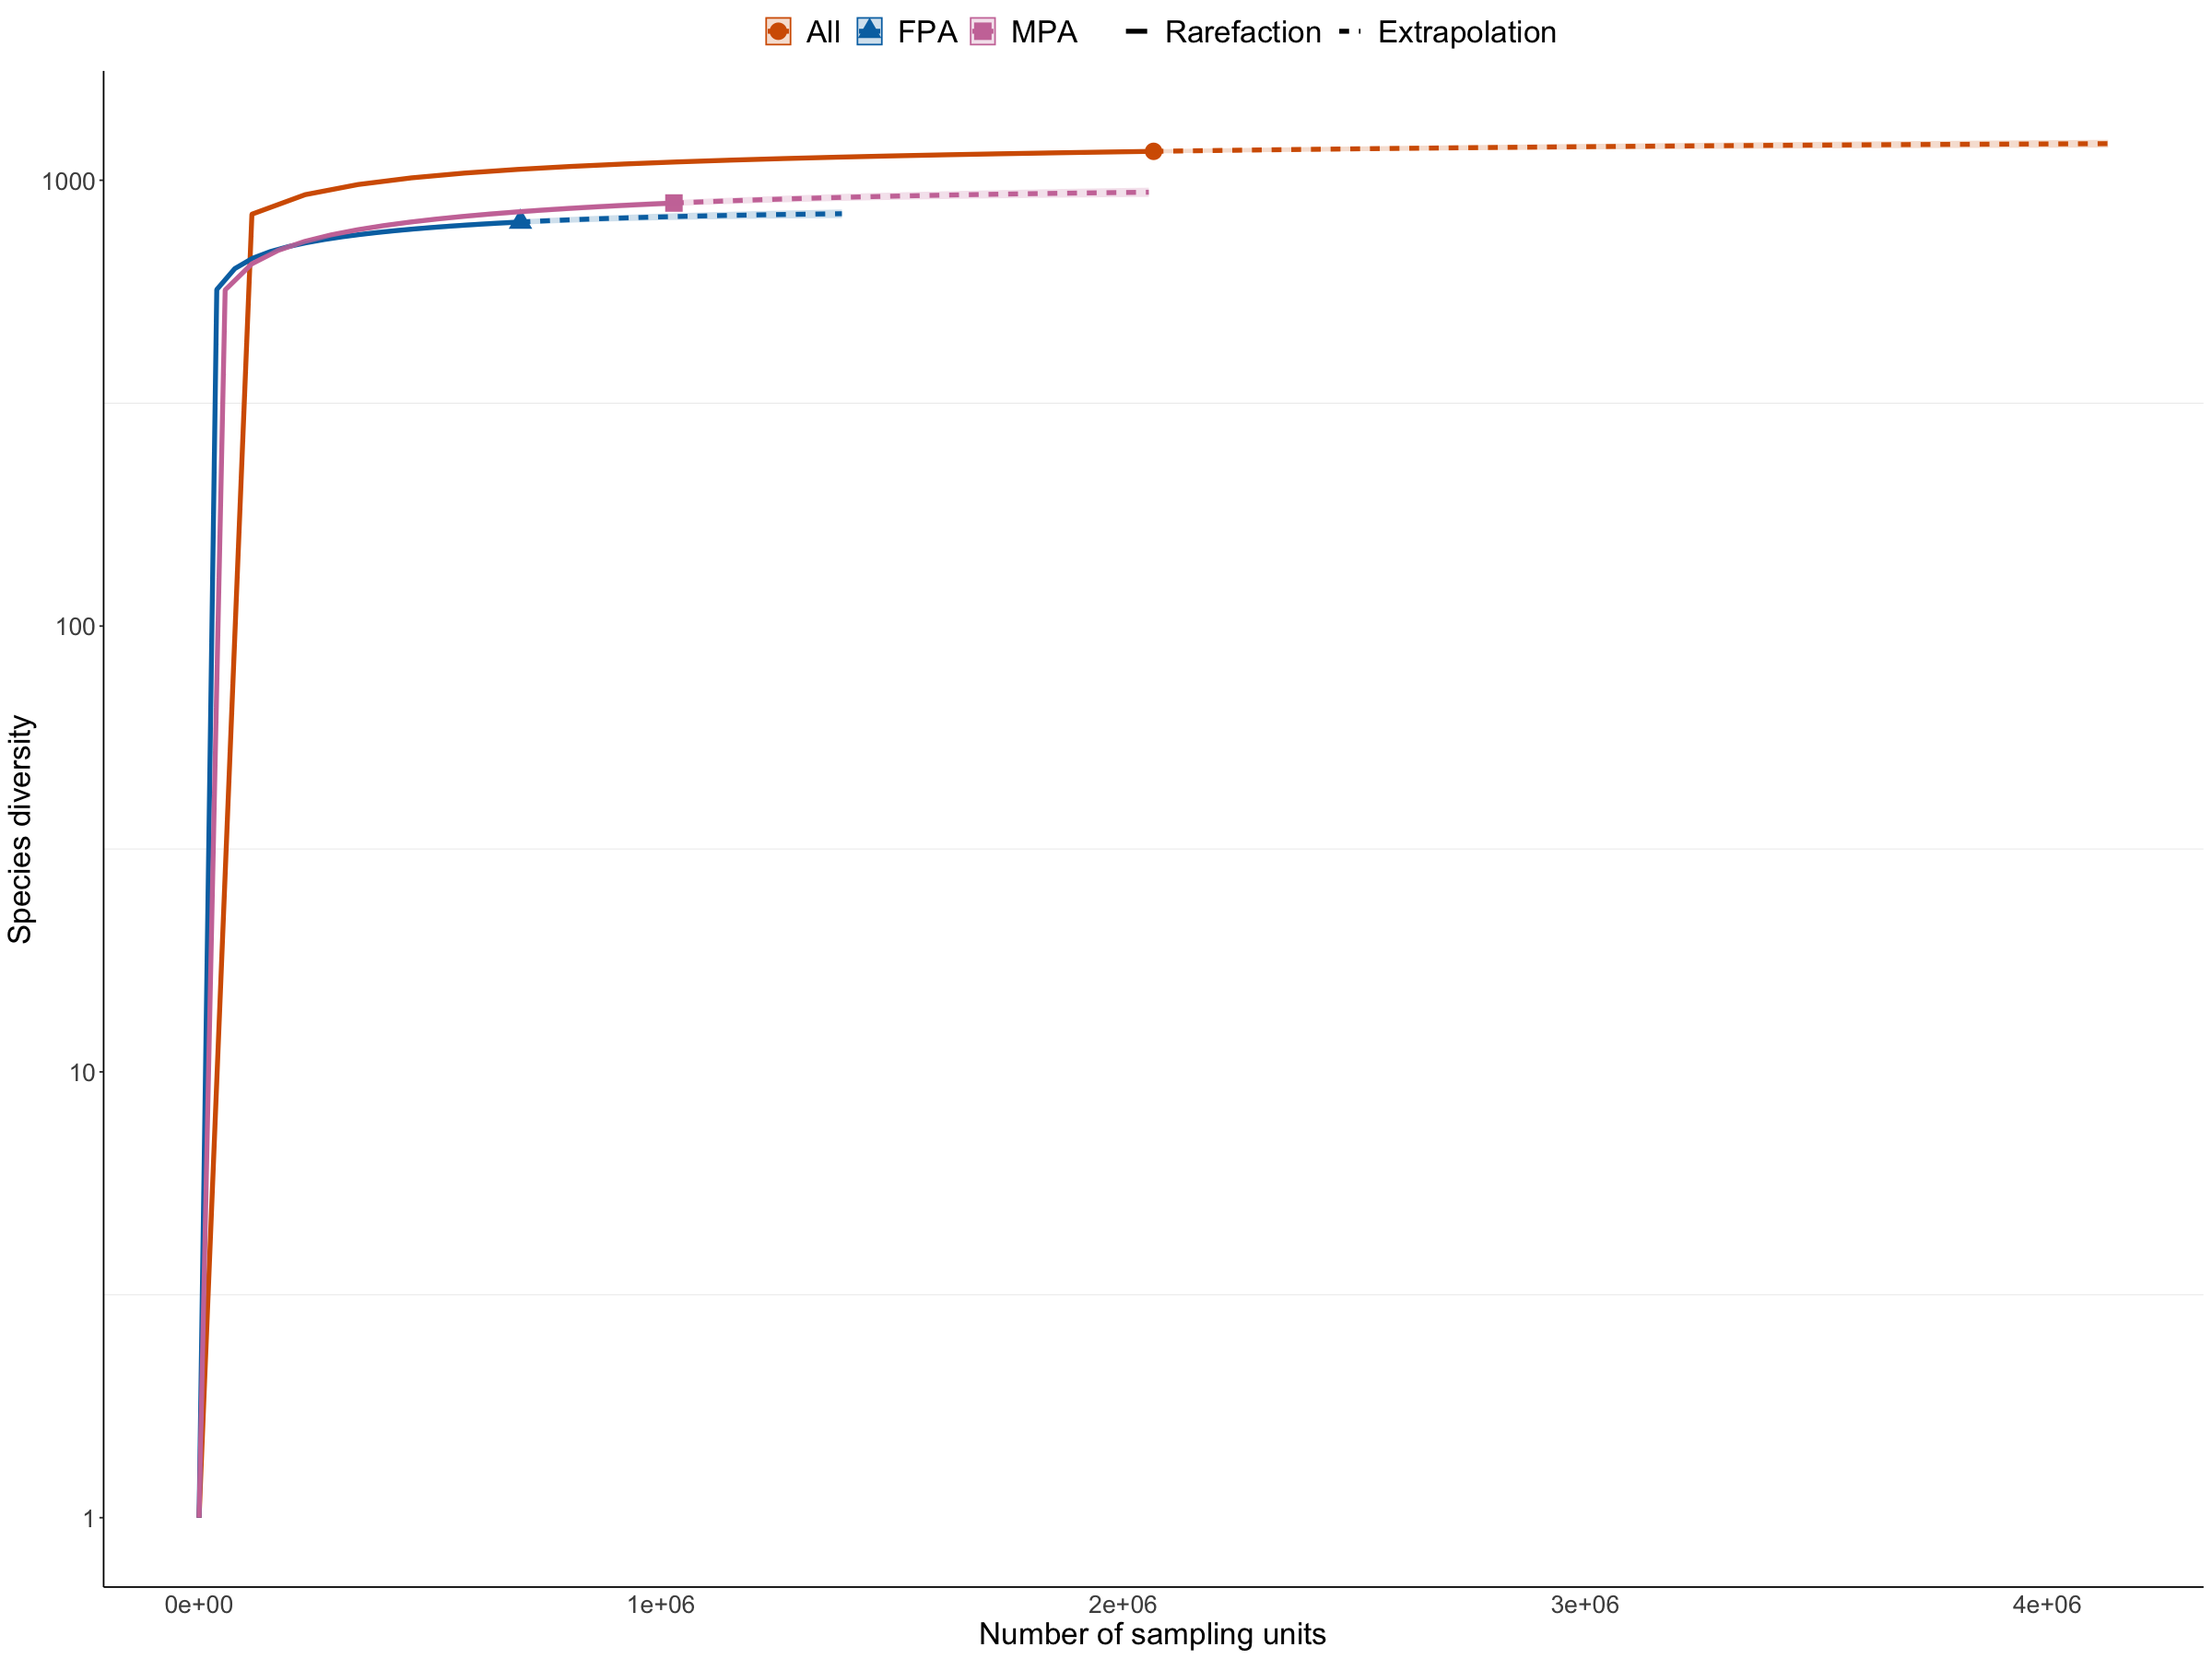

In [21]:
plot+scale_y_continuous(trans = "log10")

In [160]:
table(obis$MPA_Status)


      0       1       2 
5423926 2029871 1184110 

In [149]:
colnames(obis)

[1] "V1"                                 
  [2] "id"                                 
  [3] "scientificName"                     
  [4] "scientificNameAuthorship"           
  [5] "eventDate"                          
  [6] "decimalLongitude"                   
  [7] "decimalLatitude"                    
  [8] "institutionCode"                    
  [9] "collectionCode"                     
 [10] "catalogNumber"                      
 [11] "scientificNameID"                   
 [12] "originalscientificname"             
 [13] "absence"                            
 [14] "acceptedNameUsage"                  
 [15] "acceptedNameUsageID"                
 [16] "accessRights"                       
 [17] "aphiaID"                            
 [18] "associatedMedia"                    
 [19] "associatedOccurrences"              
 [20] "associatedReferences"               
 [21] "associatedSequences"                
 [22] "associatedTaxa"                     
 [23] "basisOfRecord"                      
 [24] "behavior"                           
 [25] "bibliographicCitation"              
 [26] "brackish"                           
 [27] "category"                           
 [28] "class"                              
 [29] "classid"                            
 [30] "collectionID"                       
 [31] "continent"                          
 [32] "coordinatePrecision"                
 [33] "coordinateUncertaintyInMeters"      
 [34] "country"                            
 [35] "countryCode"                        
 [36] "county"                             
 [37] "dataGeneralizations"                
 [38] "datasetID"                          
 [39] "datasetName"                        
 [40] "dataset_id"                         
 [41] "dateIdentified"                     
 [42] "date_end"                           
 [43] "date_mid"                           
 [44] "date_start"                         
 [45] "date_year"                          
 [46] "day"                                
 [47] "disposition"                        
 [48] "division"                           
 [49] "divisionid"                         
 [50] "dropped"                            
 [51] "dynamicProperties"                  
 [52] "endDayOfYear"                       
 [53] "establishmentMeans"                 
 [54] "eventID"                            
 [55] "eventRemarks"                       
 [56] "eventTime"                          
 [57] "family"                             
 [58] "familyid"                           
 [59] "fieldNotes"                         
 [60] "fieldNumber"                        
 [61] "footprintSRS"                       
 [62] "footprintWKT"                       
 [63] "forma"                              
 [64] "formaid"                            
 [65] "genus"                              
 [66] "genusid"                            
 [67] "geodeticDatum"                      
 [68] "georeferenceProtocol"               
 [69] "georeferenceRemarks"                
 [70] "georeferenceSources"                
 [71] "georeferenceVerificationStatus"     
 [72] "georeferencedBy"                    
 [73] "georeferencedDate"                  
 [74] "group"                              
 [75] "hab"                                
 [76] "habitat"                            
 [77] "higherClassification"               
 [78] "higherGeography"                    
 [79] "higherGeographyID"                  
 [80] "identificationID"                   
 [81] "identificationQualifier"            
 [82] "identificationReferences"           
 [83] "identificationRemarks"              
 [84] "identificationVerificationStatus"   
 [85] "identifiedBy"                       
 [86] "individualCount"                    
 [87] "individualID"                       
 [88] "informationWithheld"                
 [89] "infraclass"                         
 [90] "infraclassid"                       
 [91] "infrakingdom"                      

In [126]:
#separate inside and outside
inside=obis[obis$MPA_Status==1,]
outside=obis[obis$MPA_Status==0,]

In [127]:
#remove unnecessary columns
inside=inside[,c(3,238, 239)]
outside=outside[,c(3,238, 239)]

In [128]:
inside=inside[!duplicated(inside), ]
outside=outside[!duplicated(outside), ]


In [129]:
inside$occurrence=1
outside$occurrence=1

In [130]:
inside$MPA_Status=NULL
outside$MPA_Status=NULL

In [133]:
inside_sum=summarise(group_by(inside, scientificName), sum(occurrence))
outside_sum=summarise(group_by(outside, scientificName), sum(occurrence))

In [135]:
colnames(inside_sum)=c("scientificName", "occurrence")
colnames(outside_sum)=c("scientificName", "occurrence")

In [136]:
inside_incidence_samp = (c(234200, inside_sum$occurrence))
outside_incidence_samp = (c(1120677, outside_sum$occurrence))


In [138]:
outside_incidence_samp

[1] 1120677    7891      10       9       2      16       1       1       1
   [10]      10       2       8      29       5      18       1       5       1
   [19]       5       8       1       2       2       1       1       1      11
   [28]      43       1     244       1     242      13       1     189      10
   [37]       1      39      12      44     224      10      25     105     125
   [46]       5      46     119       9       1     189       1       5      16
   [55]      19       1       2       7       3       3       5       2       2
   [64]      33       1      11       1       6       1       1       4     212
   [73]     110       1     213      66       3       3      56      25       9
   [82]      22      15       4       3       3      11       9      11       3
   [91]       4      11      31      54     109      13       1     128       3
  [100]       4     231       5       5       1      16       3     105       6
  [109]       6       1       4       1       1       1   17016       2       7
  [118]       3       8       1      24      30     286      25       2       2
  [127]      37      12      43     173      24      42      25      40      23
  [136]       3      10       7       7       9       1      48       1      25
  [145]       1       4       7       3       1       1       9      23      88
  [154]       7       3       2       5      44      35       2       6       2
  [163]       5     152       6       1       1       5       2       2       4
  [172]      11       2       6      15       8       6      57     432       6
  [181]       1       1       4      10      10     285      30     662     544
  [190]     272     655     447     163      29     572     499      87      23
  [199]    1147     162    2313     446       6    1289     524       1     403
  [208]      45     417     137       1       5       2       1       1       1
  [217]       1       1       1       1       2       2       2       1      12
  [226]      66     135     181      19     124      15    1641       1      22
  [235]       8      92       2       1       2       1      10       2      10
  [244]       1       2      39       2       1       1       8       4       5
  [253]      54      28       1       3       5       5       1       3       2
  [262]       5       1       1      80       5       1      32      57      42
  [271]    2675     254       7     403    1704       5       3       3       1
  [280]     207       1       1       2       3       9      61       2       2
  [289]       3       4       3       2     236       5       3       1      37
  [298]       2       3      11       9       9       1      34      15       1
  [307]       2      20      27       1      20       1       2       3       1
  [316]       1       1       3       2       7       3       3       2       6
  [325]       2       1      17       1     213      15      42      81      36
  [334]      11      10      24       3       1      27       5       2       1
  [343]       6       5       1       7      34      15      17      22       2
  [352]       2       3      41       9       7       2       3       2       4
  [361]       2       5       4       1       5      22       2       2       3
  [370]       5       6      15       4       5       1       1       3       2
  [379]      19       3       2       1       6       8       4       1      16
  [388]       2       2       2       1       2       1       1       2      20
  [397]       1       7       5       5       2       3       4       1       6
  [406]       4    1258     198      53      32       5       5      27      97
  [415]       1      18       1      27       1       4       2       2       2
  [424]       9       1      30     108      16       1       1       1       4
  [433]       1      18      10       9       9       5      46       1      75
  [442]       1       1      19       8       6       1       6       4       6
  [4

In [140]:
write.csv(inside_incidence_samp, file="~/Documents/Lenfest/Plot_CSV_v2/inside_inext.csv")
write.csv(outside_incidence_samp, file="~/Documents/Lenfest/Plot_CSV_v2/outside_inext.csv")

In [ ]:
gsrich=iNEXT(inside_incidence_samp, q = 0, datatype = "incidence_freq")

In [ ]:
ggiNEXT(gsrich)

In [62]:
inside=pivot_wider(inside, names_from = Longlat, values_from = occurrence, values_fill = 0)


Warning message in nrow * ncol:
“NAs produced by integer overflow”


ERROR: [1m[33mError[39m in `vec_rep_each()`:[22m
[33m![39m `times` can't be missing. Location 1 is missing.


In [51]:
outside[!duplicated(outside), ]


scientificName,MPA_Status,Longlat
<chr>,<int>,<chr>
Oikopleura (Vexillaria) labradoriensis,0,-18048
Oncorhynchus mykiss,0,-18048.0086585715107
Oikopleura (Vexillaria) labradoriensis,0,-18049
Oikopleura (Vexillaria) labradoriensis,0,-18048.5
Oikopleura (Vexillaria) labradoriensis,0,-18050
Oikopleura (Vexillaria) labradoriensis,0,-18049.5
Fritillaria pellucida,0,-18049
Calcigorgia spiculifera,0,-18052.1669998169
Calcigorgia spiculifera,0,-179.9952.17


In [35]:
dim(outside)

[1] 5423926     239

In [ ]:
pivot_wider()

In [36]:
head(obis, 100)

V1,id,scientificName,scientificNameAuthorship,eventDate,decimalLongitude,decimalLatitude,institutionCode,collectionCode,catalogNumber,⋯,verbatimLongitude,verbatimSRS,verbatimTaxonRank,vernacularName,waterBody,year,flags,geometry,MPA_Status,Longlat
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
5013462,6dd276d8-baa7-4527-bd2a-384e6371e67f,Chiloconger dentatus,"(Garman, 1899)",1956-06-10T12:00:00Z,-180.000,28.00000,USNM,Occurrence,USNM 00195856,⋯,,,NA,,North America,,no_depth,POINT (-3581387.702269421 3601791.818446564),1,-18028
1046534,16eecccf-61d2-4d68-be89-375ba7c9be68,Oikopleura (Vexillaria) labradoriensis,"Lohmann, 1892",1984-06-16T07:48:00Z,-180.000,48.00000,Hokkaido,Zooplanktology,2902,⋯,,,NA,,,1984.0,,POINT (-3234348.349917274 5869016.450953229),0,-18048
1375164,1e20993e-0b66-456f-b2a8-1f5818bad3df,Oncorhynchus mykiss,,2009-06/2009-07,-180.000,48.00866,,,,⋯,,,NA,,,2009,no_depth,POINT (-3234158.301097566 5869904.320324409),0,-18048.0086585715107
1467926,2027d7c1-f52d-4728-9b33-a5ccfc37366e,Oikopleura (Vexillaria) labradoriensis,"Lohmann, 1892",1981-06-21T10:00:00Z,-180.000,49.00000,Hokkaido,Zooplanktology,2686,⋯,,,NA,,,1981.0,,POINT (-3212169.685128112 5970912.622855222),0,-18049
1641373,23f52403-074c-43f8-974c-8e557536292c,Oikopleura (Vexillaria) labradoriensis,"Lohmann, 1892",1981-06-21T05:06:00Z,-180.000,48.50000,Hokkaido,Zooplanktology,2683,⋯,,,NA,,,1981,,POINT (-3223316.896664542 5920128.169204712),0,-18048.5
1929455,2a44c840-ee8e-46ca-b7b1-abb72ead30cb,Oncorhynchus mykiss,,2001-06/2001-07,-180.000,48.00866,,,,⋯,,,NA,,,2001,no_depth,POINT (-3234158.301097566 5869904.320324409),0,-18048.0086585715107
3381101,4a087cc6-61bd-4b95-b68b-4ae7c2e69dc7,Oikopleura (Vexillaria) labradoriensis,"Lohmann, 1892",1982-06-21T05:00:00Z,-180.000,49.00000,Hokkaido,Zooplanktology,2762,⋯,,,NA,,,1982,,POINT (-3212169.685128112 5970912.622855222),0,-18049
4685989,66a632d4-9a48-478d-a503-3791453bc9d4,Oikopleura (Vexillaria) labradoriensis,"Lohmann, 1892",1988-06-20T12:36:00Z,-180.000,48.00000,Hokkaido,Zooplanktology,3290,⋯,,,NA,,,1988,,POINT (-3234348.349917274 5869016.450953229),0,-18048
5302631,742aaeb3-e4c9-4e7d-9db7-f10299217376,Oncorhynchus mykiss,,1997-06/1997-07,-180.000,48.00866,,,,⋯,,,NA,,,1997,no_depth,POINT (-3234158.301097566 5869904.320324409),0,-18048.0086585715107


In [17]:
colnames(obis)

[1] "V1"                                 
  [2] "id"                                 
  [3] "scientificName"                     
  [4] "scientificNameAuthorship"           
  [5] "eventDate"                          
  [6] "decimalLongitude"                   
  [7] "decimalLatitude"                    
  [8] "institutionCode"                    
  [9] "collectionCode"                     
 [10] "catalogNumber"                      
 [11] "scientificNameID"                   
 [12] "originalscientificname"             
 [13] "absence"                            
 [14] "acceptedNameUsage"                  
 [15] "acceptedNameUsageID"                
 [16] "accessRights"                       
 [17] "aphiaID"                            
 [18] "associatedMedia"                    
 [19] "associatedOccurrences"              
 [20] "associatedReferences"               
 [21] "associatedSequences"                
 [22] "associatedTaxa"                     
 [23] "basisOfRecord"                      
 [24] "behavior"                           
 [25] "bibliographicCitation"              
 [26] "brackish"                           
 [27] "category"                           
 [28] "class"                              
 [29] "classid"                            
 [30] "collectionID"                       
 [31] "continent"                          
 [32] "coordinatePrecision"                
 [33] "coordinateUncertaintyInMeters"      
 [34] "country"                            
 [35] "countryCode"                        
 [36] "county"                             
 [37] "dataGeneralizations"                
 [38] "datasetID"                          
 [39] "datasetName"                        
 [40] "dataset_id"                         
 [41] "dateIdentified"                     
 [42] "date_end"                           
 [43] "date_mid"                           
 [44] "date_start"                         
 [45] "date_year"                          
 [46] "day"                                
 [47] "disposition"                        
 [48] "division"                           
 [49] "divisionid"                         
 [50] "dropped"                            
 [51] "dynamicProperties"                  
 [52] "endDayOfYear"                       
 [53] "establishmentMeans"                 
 [54] "eventID"                            
 [55] "eventRemarks"                       
 [56] "eventTime"                          
 [57] "family"                             
 [58] "familyid"                           
 [59] "fieldNotes"                         
 [60] "fieldNumber"                        
 [61] "footprintSRS"                       
 [62] "footprintWKT"                       
 [63] "forma"                              
 [64] "formaid"                            
 [65] "genus"                              
 [66] "genusid"                            
 [67] "geodeticDatum"                      
 [68] "georeferenceProtocol"               
 [69] "georeferenceRemarks"                
 [70] "georeferenceSources"                
 [71] "georeferenceVerificationStatus"     
 [72] "georeferencedBy"                    
 [73] "georeferencedDate"                  
 [74] "group"                              
 [75] "hab"                                
 [76] "habitat"                            
 [77] "higherClassification"               
 [78] "higherGeography"                    
 [79] "higherGeographyID"                  
 [80] "identificationID"                   
 [81] "identificationQualifier"            
 [82] "identificationReferences"           
 [83] "identificationRemarks"              
 [84] "identificationVerificationStatus"   
 [85] "identifiedBy"                       
 [86] "individualCount"                    
 [87] "individualID"                       
 [88] "informationWithheld"                
 [89] "infraclass"                         
 [90] "infraclassid"                       
 [91] "infrakingdom"                      

In [18]:
table(obis$collectionCode)


                                                                                      
                                                                              3599223 
                                                                                00.99 
                                                                                  179 
                                                                                    1 
                                                                                  326 
                                                                                 1003 
                                                                                   19 
                                                                                 1005 
                                                                                    4 
                                                                                 1006 
                                          

In [19]:
table(obis$MPA_Status, obis$collectionID)

   
            56bf7b66-ed07-4b91-9f0d-1f00de11fab8
  0 5257388                                71912
  1 2018486                                 8551
  2 1182569                                 1448
   
    Historical_CatchStatistics_2_TomReilly http://grbio.org/cool/fpjs-vpys
  0                                     99                            2116
  1                                      0                             274
  2                                      0                               0
   
    urn:lsid:biocol.org:col:35205
  0                         92411
  1                          2560
  2                            93

In [15]:
table(obis$MPA_Status, obis$collectionCode)

   
            00.99      1   1006   1010   1017   1018    107   1071   1072
  0 198544     10      9   1690     55      4     11    126    213     40
  1  20747      0      0      0      2      0      0      0      0      0
   
      1074    109    111    113   1138   1140   1158   1166   1192   1194
  0    961    124      0    334     73     49     15     46    101    118
  1      0      1      1      1      0      0      0      0      0      0
   
    12-MILE DUMPSITE   1201   1229   1231   1233   1235   1237   1243   1245
  0            11136   5254     94    165    146     47     78     37     94
  1                0     15      0      0      0      0      0      0      0
   
      1247   1249   1259   1269   1271   1273   1275   1277   1288   1289
  0     81     82     64    176    141     31     56     14     47     56
  1      0      0      0      0      0      0      1      0      2      0
   
      1302   1322   1340   1350   1352   1354   1356   1358   1360   1373
  0      